In [1]:
import quandl
import pandas as pd
import numpy as np
import datetime as dt
import pandas_profiling
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from collections import defaultdict
# Import supplementary visualization code visuals.py
#import visuals as vs
from numpy import concatenate

# magic word for producing visualizations in notebook
%matplotlib inline

In [3]:
quandl.ApiConfig.api_key = "v5Bazu_S389s29HiutZh"

In [4]:
#Get data from Quandl APIs into dataframes
SP500_DIV_YIELD_MONTH = quandl.get('MULTPL/SP500_DIV_YIELD_MONTH') #MULTPLkeys[0]
SP500_PE_RATIO_MONTH = quandl.get('MULTPL/SP500_PE_RATIO_MONTH')
SHILLER_PE_RATIO_MONTH = quandl.get('MULTPL/SHILLER_PE_RATIO_MONTH')
SP500_EARNINGS_YIELD_MONTH = quandl.get('MULTPL/SP500_EARNINGS_YIELD_MONTH')
SP500_INFLADJ_MONTH = quandl.get('MULTPL/SP500_INFLADJ_MONTH')#MULTPLkeys[4]

SP500_PSR_QUARTER = quandl.get('MULTPL/SP500_PSR_QUARTER')
SP500_DIV_MONTH = quandl.get('MULTPL/SP500_DIV_MONTH')
SP500_DIV_YEAR = quandl.get('MULTPL/SP500_DIV_YEAR')
SP500_DIV_GROWTH_YEAR = quandl.get('MULTPL/SP500_DIV_GROWTH_YEAR')
SP500_DIV_GROWTH_QUARTER = quandl.get('MULTPL/SP500_DIV_GROWTH_QUARTER')
SP500_PBV_RATIO_QUARTER = quandl.get('MULTPL/SP500_PBV_RATIO_QUARTER') #MULTPLkeys[10]

SHILLER_PE_RATIO_YEAR = quandl.get('MULTPL/SHILLER_PE_RATIO_YEAR')
SP500_PE_RATIO_YEAR = quandl.get('MULTPL/SP500_PE_RATIO_YEAR')
SP500_DIV_YIELD_YEAR = quandl.get('MULTPL/SP500_DIV_YIELD_YEAR')
SP500_PSR_YEAR = quandl.get('MULTPL/SP500_PSR_YEAR')
SP500_EARNINGS_YIELD_YEAR = quandl.get('MULTPL/SP500_EARNINGS_YIELD_YEAR')
SP500_PBV_RATIO_YEAR =  quandl.get('MULTPL/SP500_PBV_RATIO_YEAR')
SP500_INFLADJ_YEAR =  quandl.get('MULTPL/SP500_INFLADJ_YEAR')
SP500_REAL_PRICE_MONTH = quandl.get('MULTPL/SP500_REAL_PRICE_MONTH') #MULTPLkeys[18]
SP500_SALES_YEAR =  quandl.get('MULTPL/SP500_SALES_YEAR')

SP500_SALES_GROWTH_YEAR = quandl.get('MULTPL/SP500_SALES_GROWTH_YEAR') #MULTPLkeys[20]
SP500_SALES_QUARTER =  quandl.get('MULTPL/SP500_SALES_QUARTER')
SP500_REAL_SALES_GROWTH_QUARTER = quandl.get('MULTPL/SP500_REAL_SALES_GROWTH_QUARTER')
SP500_SALES_GROWTH_QUARTER = quandl.get('MULTPL/SP500_SALES_GROWTH_QUARTER')
SP500_REAL_SALES_GROWTH_YEAR = quandl.get('MULTPL/SP500_REAL_SALES_GROWTH_YEAR')
SP500_REAL_EARNINGS_GROWTH_YEAR = quandl.get('MULTPL/SP500_REAL_EARNINGS_GROWTH_YEAR')
SP500_REAL_SALES_YEAR = quandl.get('MULTPL/SP500_REAL_SALES_YEAR')
SP500_REAL_EARNINGS_GROWTH_QUARTER = quandl.get('MULTPL/SP500_REAL_EARNINGS_GROWTH_QUARTER')
SP500_EARNINGS_GROWTH_QUARTER = quandl.get('MULTPL/SP500_EARNINGS_GROWTH_QUARTER')
SP500_REAL_SALES_QUARTER = quandl.get('MULTPL/SP500_REAL_SALES_QUARTER')

SP500_EARNINGS_MONTH = quandl.get('MULTPL/SP500_EARNINGS_MONTH') #MULTPLkeys[30]
SP500_BVPS_YEAR = quandl.get('MULTPL/SP500_BVPS_YEAR')
SP500_EARNINGS_YEAR = quandl.get('MULTPL/SP500_EARNINGS_YEAR')
SP500_EARNINGS_GROWTH_YEAR = quandl.get('MULTPL/SP500_EARNINGS_GROWTH_YEAR')
SP500_BVPS_QUARTER = quandl.get('MULTPL/SP500_BVPS_QUARTER')
SP500_REAL_PRICE_YEAR = quandl.get('MULTPL/SP500_REAL_PRICE_YEAR') #MULTPLkeys[35]

In [5]:
#API keywords list
MULTPLkeys = [
'MULTPL/SP500_DIV_YIELD_MONTH',
'MULTPL/SP500_PE_RATIO_MONTH',
'MULTPL/SHILLER_PE_RATIO_MONTH',
'MULTPL/SP500_EARNINGS_YIELD_MONTH',
'MULTPL/SP500_INFLADJ_MONTH',
'MULTPL/SP500_PSR_QUARTER',
'MULTPL/SP500_DIV_MONTH',
'MULTPL/SP500_DIV_YEAR',
'MULTPL/SP500_DIV_GROWTH_YEAR',
'MULTPL/SP500_DIV_GROWTH_QUARTER',
'MULTPL/SP500_PBV_RATIO_QUARTER',
'MULTPL/SHILLER_PE_RATIO_YEAR',
'MULTPL/SP500_PE_RATIO_YEAR',
'MULTPL/SP500_DIV_YIELD_YEAR',
'MULTPL/SP500_PSR_YEAR',
'MULTPL/SP500_EARNINGS_YIELD_YEAR',
'MULTPL/SP500_PBV_RATIO_YEAR',
'MULTPL/SP500_INFLADJ_YEAR',
'MULTPL/SP500_REAL_PRICE_MONTH',
'MULTPL/SP500_SALES_YEAR',
'MULTPL/SP500_SALES_GROWTH_YEAR',
'MULTPL/SP500_SALES_QUARTER',
'MULTPL/SP500_REAL_SALES_GROWTH_QUARTER',
'MULTPL/SP500_SALES_GROWTH_QUARTER',
'MULTPL/SP500_REAL_SALES_GROWTH_YEAR',
'MULTPL/SP500_REAL_EARNINGS_GROWTH_YEAR',
'MULTPL/SP500_REAL_SALES_YEAR',
'MULTPL/SP500_REAL_EARNINGS_GROWTH_QUARTER',
'MULTPL/SP500_EARNINGS_GROWTH_QUARTER',
'MULTPL/SP500_REAL_SALES_QUARTER',
'MULTPL/SP500_EARNINGS_MONTH',
'MULTPL/SP500_BVPS_YEAR',
'MULTPL/SP500_EARNINGS_YEAR',
'MULTPL/SP500_EARNINGS_GROWTH_YEAR',
'MULTPL/SP500_BVPS_QUARTER',
'MULTPL/SP500_REAL_PRICE_YEAR'
]

#Split API keywords to create df variable names
var_list = [i.split('/')[1] for i in MULTPLkeys]
print(var_list[0],var_list[1],var_list[2])

SP500_DIV_YIELD_MONTH SP500_PE_RATIO_MONTH SHILLER_PE_RATIO_MONTH


In [6]:
# def get_data(i):
#     return quandl.get('MULTPL/{}'.format(i))

In [7]:
var_list

['SP500_DIV_YIELD_MONTH',
 'SP500_PE_RATIO_MONTH',
 'SHILLER_PE_RATIO_MONTH',
 'SP500_EARNINGS_YIELD_MONTH',
 'SP500_INFLADJ_MONTH',
 'SP500_PSR_QUARTER',
 'SP500_DIV_MONTH',
 'SP500_DIV_YEAR',
 'SP500_DIV_GROWTH_YEAR',
 'SP500_DIV_GROWTH_QUARTER',
 'SP500_PBV_RATIO_QUARTER',
 'SHILLER_PE_RATIO_YEAR',
 'SP500_PE_RATIO_YEAR',
 'SP500_DIV_YIELD_YEAR',
 'SP500_PSR_YEAR',
 'SP500_EARNINGS_YIELD_YEAR',
 'SP500_PBV_RATIO_YEAR',
 'SP500_INFLADJ_YEAR',
 'SP500_REAL_PRICE_MONTH',
 'SP500_SALES_YEAR',
 'SP500_SALES_GROWTH_YEAR',
 'SP500_SALES_QUARTER',
 'SP500_REAL_SALES_GROWTH_QUARTER',
 'SP500_SALES_GROWTH_QUARTER',
 'SP500_REAL_SALES_GROWTH_YEAR',
 'SP500_REAL_EARNINGS_GROWTH_YEAR',
 'SP500_REAL_SALES_YEAR',
 'SP500_REAL_EARNINGS_GROWTH_QUARTER',
 'SP500_EARNINGS_GROWTH_QUARTER',
 'SP500_REAL_SALES_QUARTER',
 'SP500_EARNINGS_MONTH',
 'SP500_BVPS_YEAR',
 'SP500_EARNINGS_YEAR',
 'SP500_EARNINGS_GROWTH_YEAR',
 'SP500_BVPS_QUARTER',
 'SP500_REAL_PRICE_YEAR']

In [8]:
# var_list1 = [
#     'SP500_DIV_YIELD_MONTH1',
#     'SP500_PE_RATIO_MONTH2',
#     'SHILLER_PE_RATIO_MONTH']

In [9]:
# for i in var_list:
#     #i = pd.DataFrame(get_data(i))
#     exec(f'{i} = get_data(i)')
#     #print(get_data(i))
#     print(i)
#     break

In [10]:
# x= 'SP500_DIV_YIELD_MONTH'
# exec("%s = %d" % (x,0))
# print(SP500_DIV_YIELD_MONTH)
# print(x)

#exec(f'{i} = get_data(i)')

In [11]:
# for i in range(len(var_list)//10):
#     x= var_list[i]    
#     exec("%s = %d" % (x,0))
#     #print(var_list[i])
#     #print(x)
#     print(SP500_DIV_YIELD_MONTH)

# # SP500_DIV_YIELD_MONTH = quandl.get(str(MULTPLkeys[0]))

# # print(SP500_DIV_YIELD_MONTH.head())
# #SP500_DIV_YIELD_MONTH
# #SP500_PE_RATIO_MONTH
# #SHILLER_PE_RATIO_MONTH

# #dynamic variables
# x= var_list[1]    
# exec("%s = %s" % (x,x))
# SP500_PE_RATIO_MONTH



In [12]:
print(SP500_REAL_PRICE_MONTH.head())
print(SP500_EARNINGS_YIELD_MONTH.head())

            Value
Date             
1871-01-01   4.44
1871-02-01   4.50
1871-03-01   4.61
1871-04-01   4.74
1871-05-01   4.86
            Value
Date             
1871-01-01   9.01
1871-02-01   8.89
1871-03-01   8.68
1871-04-01   8.44
1871-05-01   8.23


df = pd.merge(pd.merge(SP500_REAL_PRICE_MONTH,SP500_EARNINGS_YIELD_MONTH,on='Date'),SHILLER_PE_RATIO_MONTH,on='Date')
df.head()

Assumptions-
1. Assuming SP500_REAL_PRICE_MONTH is remains same on 1st of every month and last day of that month to remove NaN values.
2. SP500_DIV_YIELD_MONTH and yield values are available for last day of every month. Assuming it remains the same on first of next month by carrying over the same value to first day of next month.

    outer join between price and monthly yield df to include all dates of every month.

    SP500_REAL_PRICE_MONTH is the target label hence start with this df to include all rows 

In [13]:
SP500_DIV_YIELD_MONTH.head()

Value
Date             
1871-01-31   5.86
1871-02-28   5.78
1871-03-31   5.64
1871-04-30   5.49
1871-05-31   5.35

In [14]:
#Join all month dataframes together on date column.

df = SP500_REAL_PRICE_MONTH.join(SP500_DIV_YIELD_MONTH,on=None,how='outer',
                                  lsuffix='_SP500_REAL_PRICE_MONTH',rsuffix='_SP500_DIV_YIELD_MONTH',sort=False)

df= df.join(SP500_PE_RATIO_MONTH,on='Date',how='left',sort=False)

df = df.merge(
    SHILLER_PE_RATIO_MONTH,on='Date',how='left').merge(
    SP500_EARNINGS_YIELD_MONTH,on='Date',how='left').merge(
    SP500_INFLADJ_MONTH,on='Date',how='left').merge(
    SP500_PSR_QUARTER,on='Date',how='left').merge(
    SP500_DIV_MONTH,on='Date',how='outer').merge(
    SP500_DIV_YEAR,on='Date',how='left')


df.columns = ['Value_SP500_REAL_PRICE_MONTH','Value_SP500_DIV_YIELD_MONTH','Value_SP500_PE_RATIO_MONTH',
                'Value_SHILLER_PE_RATIO_MONTH','Value_SP500_EARNINGS_YIELD_MONTH','Value_SP500_INFLADJ_MONTH',
              'Value_SP500_PSR_QUARTER','Value_SP500_DIV_MONTH','Value_SP500_DIV_YEAR'
             ]

#print(df.head(6))
print(df.columns)
print(df.shape)

Index(['Value_SP500_REAL_PRICE_MONTH', 'Value_SP500_DIV_YIELD_MONTH',
       'Value_SP500_PE_RATIO_MONTH', 'Value_SHILLER_PE_RATIO_MONTH',
       'Value_SP500_EARNINGS_YIELD_MONTH', 'Value_SP500_INFLADJ_MONTH',
       'Value_SP500_PSR_QUARTER', 'Value_SP500_DIV_MONTH',
       'Value_SP500_DIV_YEAR'],
      dtype='object')
(3547, 9)


In [15]:
def Merge__Rename_function(df,df_var,column_name):
    df = df.merge(df_var,on='Date',how='outer')
    Column_name = 'Value_' + str(column_name)
    #print(Column_name)
    df.rename({'Value':Column_name},axis=1,inplace=True)
    #print(df.head(6))
    print(df.shape)
    #print(df.columns)
    
    return df

In [16]:
var_list

['SP500_DIV_YIELD_MONTH',
 'SP500_PE_RATIO_MONTH',
 'SHILLER_PE_RATIO_MONTH',
 'SP500_EARNINGS_YIELD_MONTH',
 'SP500_INFLADJ_MONTH',
 'SP500_PSR_QUARTER',
 'SP500_DIV_MONTH',
 'SP500_DIV_YEAR',
 'SP500_DIV_GROWTH_YEAR',
 'SP500_DIV_GROWTH_QUARTER',
 'SP500_PBV_RATIO_QUARTER',
 'SHILLER_PE_RATIO_YEAR',
 'SP500_PE_RATIO_YEAR',
 'SP500_DIV_YIELD_YEAR',
 'SP500_PSR_YEAR',
 'SP500_EARNINGS_YIELD_YEAR',
 'SP500_PBV_RATIO_YEAR',
 'SP500_INFLADJ_YEAR',
 'SP500_REAL_PRICE_MONTH',
 'SP500_SALES_YEAR',
 'SP500_SALES_GROWTH_YEAR',
 'SP500_SALES_QUARTER',
 'SP500_REAL_SALES_GROWTH_QUARTER',
 'SP500_SALES_GROWTH_QUARTER',
 'SP500_REAL_SALES_GROWTH_YEAR',
 'SP500_REAL_EARNINGS_GROWTH_YEAR',
 'SP500_REAL_SALES_YEAR',
 'SP500_REAL_EARNINGS_GROWTH_QUARTER',
 'SP500_EARNINGS_GROWTH_QUARTER',
 'SP500_REAL_SALES_QUARTER',
 'SP500_EARNINGS_MONTH',
 'SP500_BVPS_YEAR',
 'SP500_EARNINGS_YEAR',
 'SP500_EARNINGS_GROWTH_YEAR',
 'SP500_BVPS_QUARTER',
 'SP500_REAL_PRICE_YEAR']

In [17]:
df = Merge__Rename_function(df,SP500_DIV_GROWTH_YEAR,'SP500_DIV_GROWTH_YEAR')
df = Merge__Rename_function(df,SP500_DIV_GROWTH_QUARTER,'SP500_DIV_GROWTH_QUARTER')
df = Merge__Rename_function(df,SP500_PBV_RATIO_QUARTER,'SP500_PBV_RATIO_QUARTER')

df = Merge__Rename_function(df,SHILLER_PE_RATIO_YEAR,'SHILLER_PE_RATIO_YEAR')
df = Merge__Rename_function(df,SP500_PE_RATIO_YEAR,'SP500_PE_RATIO_YEAR')
df = Merge__Rename_function(df,SP500_DIV_YIELD_YEAR,'SP500_DIV_YIELD_YEAR')
df = Merge__Rename_function(df,SP500_PSR_YEAR,'SP500_PSR_YEAR')
df = Merge__Rename_function(df,SP500_EARNINGS_YIELD_YEAR,'SP500_EARNINGS_YIELD_YEAR')
df = Merge__Rename_function(df,SP500_PBV_RATIO_YEAR,'SP500_PBV_RATIO_YEAR')
df = Merge__Rename_function(df,SP500_INFLADJ_YEAR,'SP500_INFLADJ_YEAR')

df = Merge__Rename_function(df,SP500_SALES_YEAR,'SP500_SALES_YEAR')
df = Merge__Rename_function(df,SP500_SALES_GROWTH_YEAR,'SP500_SALES_GROWTH_YEAR')
df = Merge__Rename_function(df,SP500_SALES_QUARTER,'SP500_SALES_QUARTER')
df = Merge__Rename_function(df,SP500_REAL_SALES_GROWTH_QUARTER,'SP500_REAL_SALES_GROWTH_QUARTER')
df = Merge__Rename_function(df,SP500_SALES_GROWTH_QUARTER,'SP500_SALES_GROWTH_QUARTER')
df = Merge__Rename_function(df,SP500_REAL_SALES_GROWTH_YEAR,'SP500_REAL_SALES_GROWTH_YEAR')
df = Merge__Rename_function(df,SP500_REAL_EARNINGS_GROWTH_YEAR,'SP500_REAL_EARNINGS_GROWTH_YEAR')
df = Merge__Rename_function(df,SP500_REAL_SALES_YEAR,'SP500_REAL_SALES_YEAR')

df = Merge__Rename_function(df,SP500_REAL_EARNINGS_GROWTH_QUARTER,var_list[27])
df = Merge__Rename_function(df,SP500_EARNINGS_GROWTH_QUARTER,var_list[28])
df = Merge__Rename_function(df,SP500_REAL_SALES_QUARTER,var_list[29])
df = Merge__Rename_function(df,SP500_EARNINGS_MONTH,var_list[30])
df = Merge__Rename_function(df,SP500_BVPS_YEAR,var_list[31])
df = Merge__Rename_function(df,SP500_EARNINGS_YEAR,var_list[32])
df = Merge__Rename_function(df,SP500_EARNINGS_GROWTH_YEAR,var_list[33])
df = Merge__Rename_function(df,SP500_BVPS_QUARTER,var_list[34])
#df = Merge__Rename_function(df,SP500_REAL_PRICE_YEAR,var_list[35])

df.columns

(3552, 10)
(3558, 11)
(3558, 12)
(3558, 13)
(3558, 14)
(3558, 15)
(3558, 16)
(3558, 17)
(3558, 18)
(3558, 19)
(3558, 20)
(3558, 21)
(3558, 22)
(3558, 23)
(3558, 24)
(3558, 25)
(3558, 26)
(3558, 27)
(3558, 28)
(3558, 29)
(3558, 30)
(3558, 31)
(3558, 32)
(3558, 33)
(3558, 34)
(3558, 35)


Index(['Value_SP500_REAL_PRICE_MONTH', 'Value_SP500_DIV_YIELD_MONTH',
       'Value_SP500_PE_RATIO_MONTH', 'Value_SHILLER_PE_RATIO_MONTH',
       'Value_SP500_EARNINGS_YIELD_MONTH', 'Value_SP500_INFLADJ_MONTH',
       'Value_SP500_PSR_QUARTER', 'Value_SP500_DIV_MONTH',
       'Value_SP500_DIV_YEAR', 'Value_SP500_DIV_GROWTH_YEAR',
       'Value_SP500_DIV_GROWTH_QUARTER', 'Value_SP500_PBV_RATIO_QUARTER',
       'Value_SHILLER_PE_RATIO_YEAR', 'Value_SP500_PE_RATIO_YEAR',
       'Value_SP500_DIV_YIELD_YEAR', 'Value_SP500_PSR_YEAR',
       'Value_SP500_EARNINGS_YIELD_YEAR', 'Value_SP500_PBV_RATIO_YEAR',
       'Value_SP500_INFLADJ_YEAR', 'Value_SP500_SALES_YEAR',
       'Value_SP500_SALES_GROWTH_YEAR', 'Value_SP500_SALES_QUARTER',
       'Value_SP500_REAL_SALES_GROWTH_QUARTER',
       'Value_SP500_SALES_GROWTH_QUARTER',
       'Value_SP500_REAL_SALES_GROWTH_YEAR',
       'Value_SP500_REAL_EARNINGS_GROWTH_YEAR', 'Value_SP500_REAL_SALES_YEAR',
       'Value_SP500_REAL_EARNINGS_GROWTH_QUARTER'

In [18]:
pandas_profiling.ProfileReport(df)

In [19]:
def Column_missing_values(df):
    '''
    Function to find missing values or NaN values per column and print percentage of missing values per column
    in bar chart.
    IN - any pandas dataframe 
    '''
    #Percentage of missing values per column
    missing_columns = df.isnull().sum()
    if missing_columns.values.any() != 0:
        missing_columns = (missing_columns[missing_columns>0]/df.shape[0]) * 100
        missing_columns.sort_values(inplace=True)
        missing_columns.plot.bar(title = 'Column wise percentage missing values', figsize=(6,3))
    else:
        print('No missing values in provided dataframe')
        
    return

In [20]:
Column_missing_values(df)

In [21]:
#Corelation plot for numerical encoded version of playstore data.
sns.heatmap(df.corr(),annot=None,fmt='.2f',square=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000134A8013CF8>,
      dtype=object)

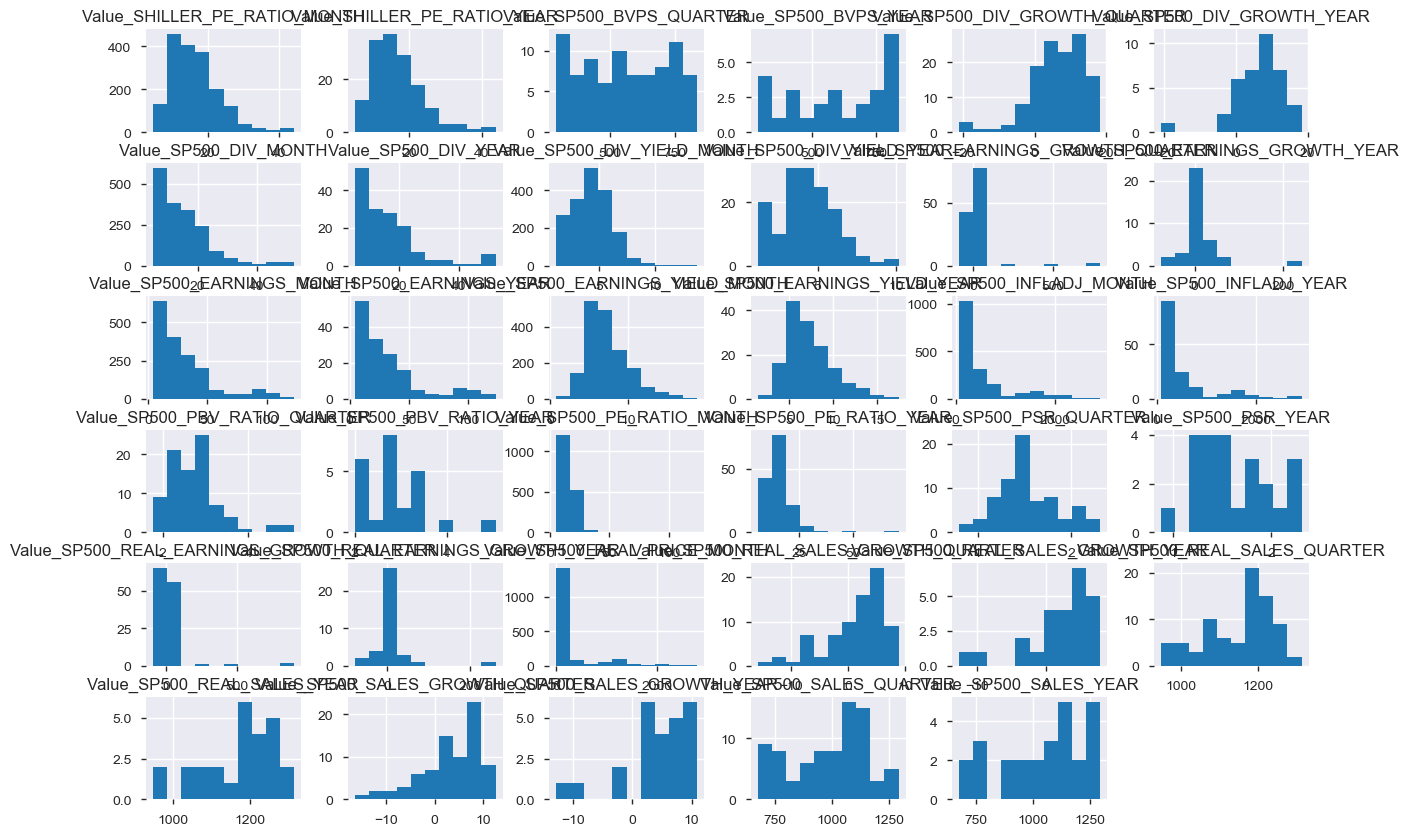

In [22]:
df.hist(figsize=(15,10))

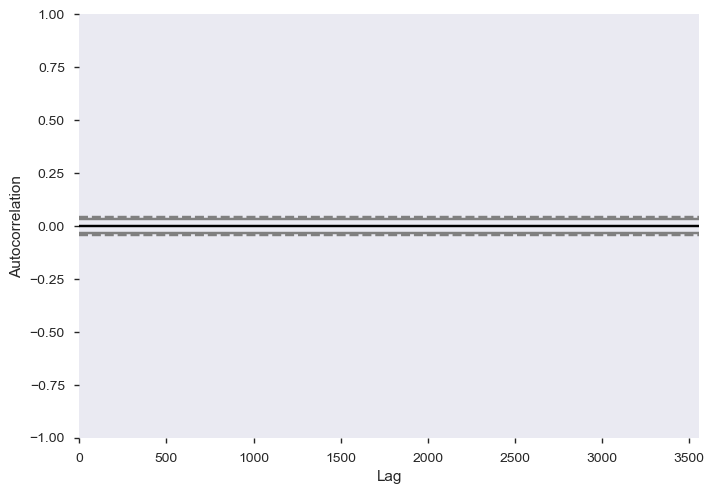

In [23]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)
plt.show()

In [24]:
#Drop last rows with NaN values for Value_SP500_REAL_PRICE_MONTH because these were outlier with no price values.
df.drop(df.tail(11).index,axis=0,inplace=True)

# Impute and Interpolate missing values

Original dataset has many missing or NaN values which is noise to end results. General methods like replacing with mean values can not be applied because it would add bias to the timeseries dataset. 

In [25]:
import  impyute.imputation.cs 
import impyute.imputation.ts
from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer, MissingIndicator
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import cross_val_score

In [26]:
#Create an imputation object
imputer_most_frequent= SimpleImputer(missing_values=np.nan,strategy ='most_frequent')

In [27]:
#Inject imputed values in the dataset.
df_imputed = pd.DataFrame(imputer_most_frequent.fit_transform(df))
df_imputed.columns = df.columns
df_imputed.index = df.index

In [28]:
pandas_profiling.ProfileReport(df_imputed)

In [29]:
#Apply linear interpolation on the dataset.
df_interpolate = df.interpolate(method='linear',axis=0,inplace=False,limit_direction='both')

In [30]:
print(df_imputed.shape)
print(df_interpolate.shape)

(3547, 35)
(3547, 35)


In [31]:
#Full profile on interpolated dataset.
pandas_profiling.ProfileReport(df_interpolate)

In [32]:
autocorrelation_plot(df_imputed)
plt.show()

In [33]:
autocorrelation_plot(df_interpolate)
plt.show()

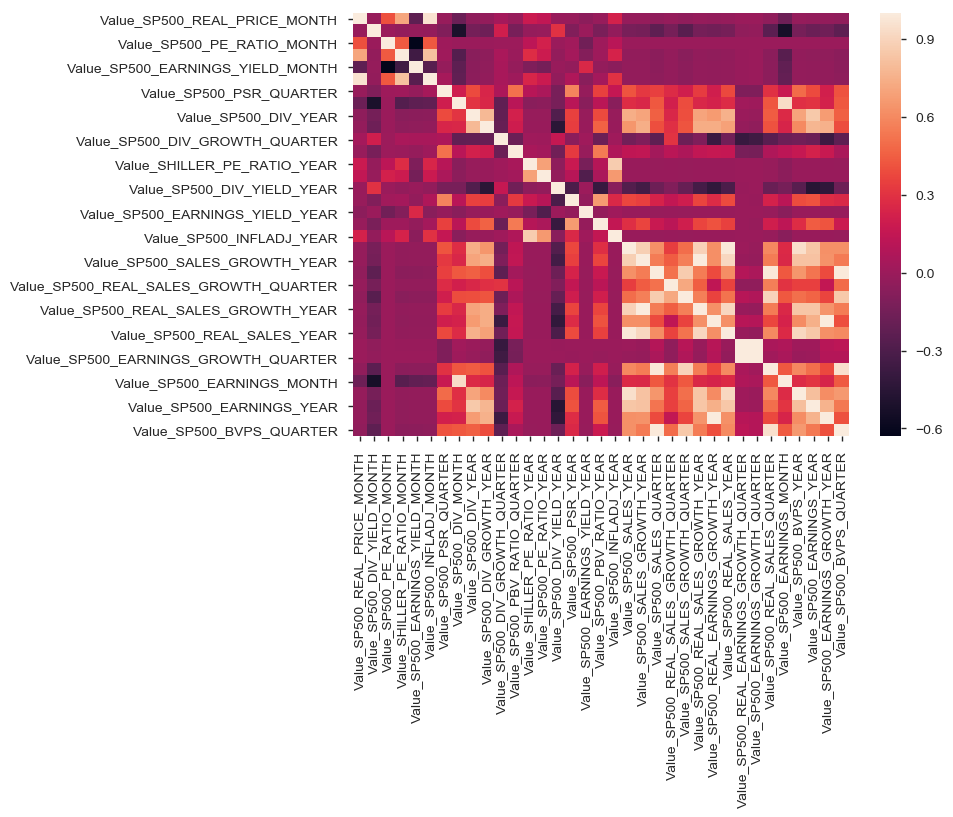

In [34]:
#Corelation plot after imputation
sns.heatmap(df_imputed.corr(),annot=None,fmt='.2f',square=False)

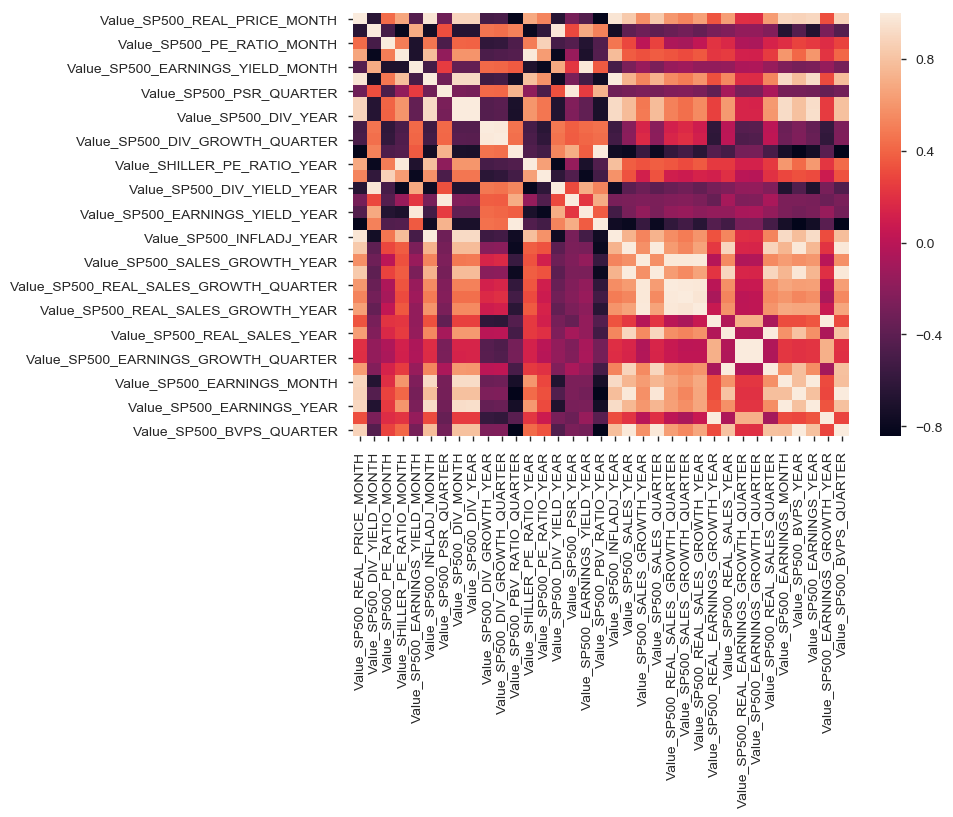

In [35]:
#Corelation plot after interpolation
sns.heatmap(df_interpolate.corr(),annot=None,fmt='.2f',square=False)

In [36]:
#Check for missing values per column and create a graph
Column_missing_values(df_imputed)
Column_missing_values(df_interpolate)

No missing values in provided dataframe
No missing values in provided dataframe


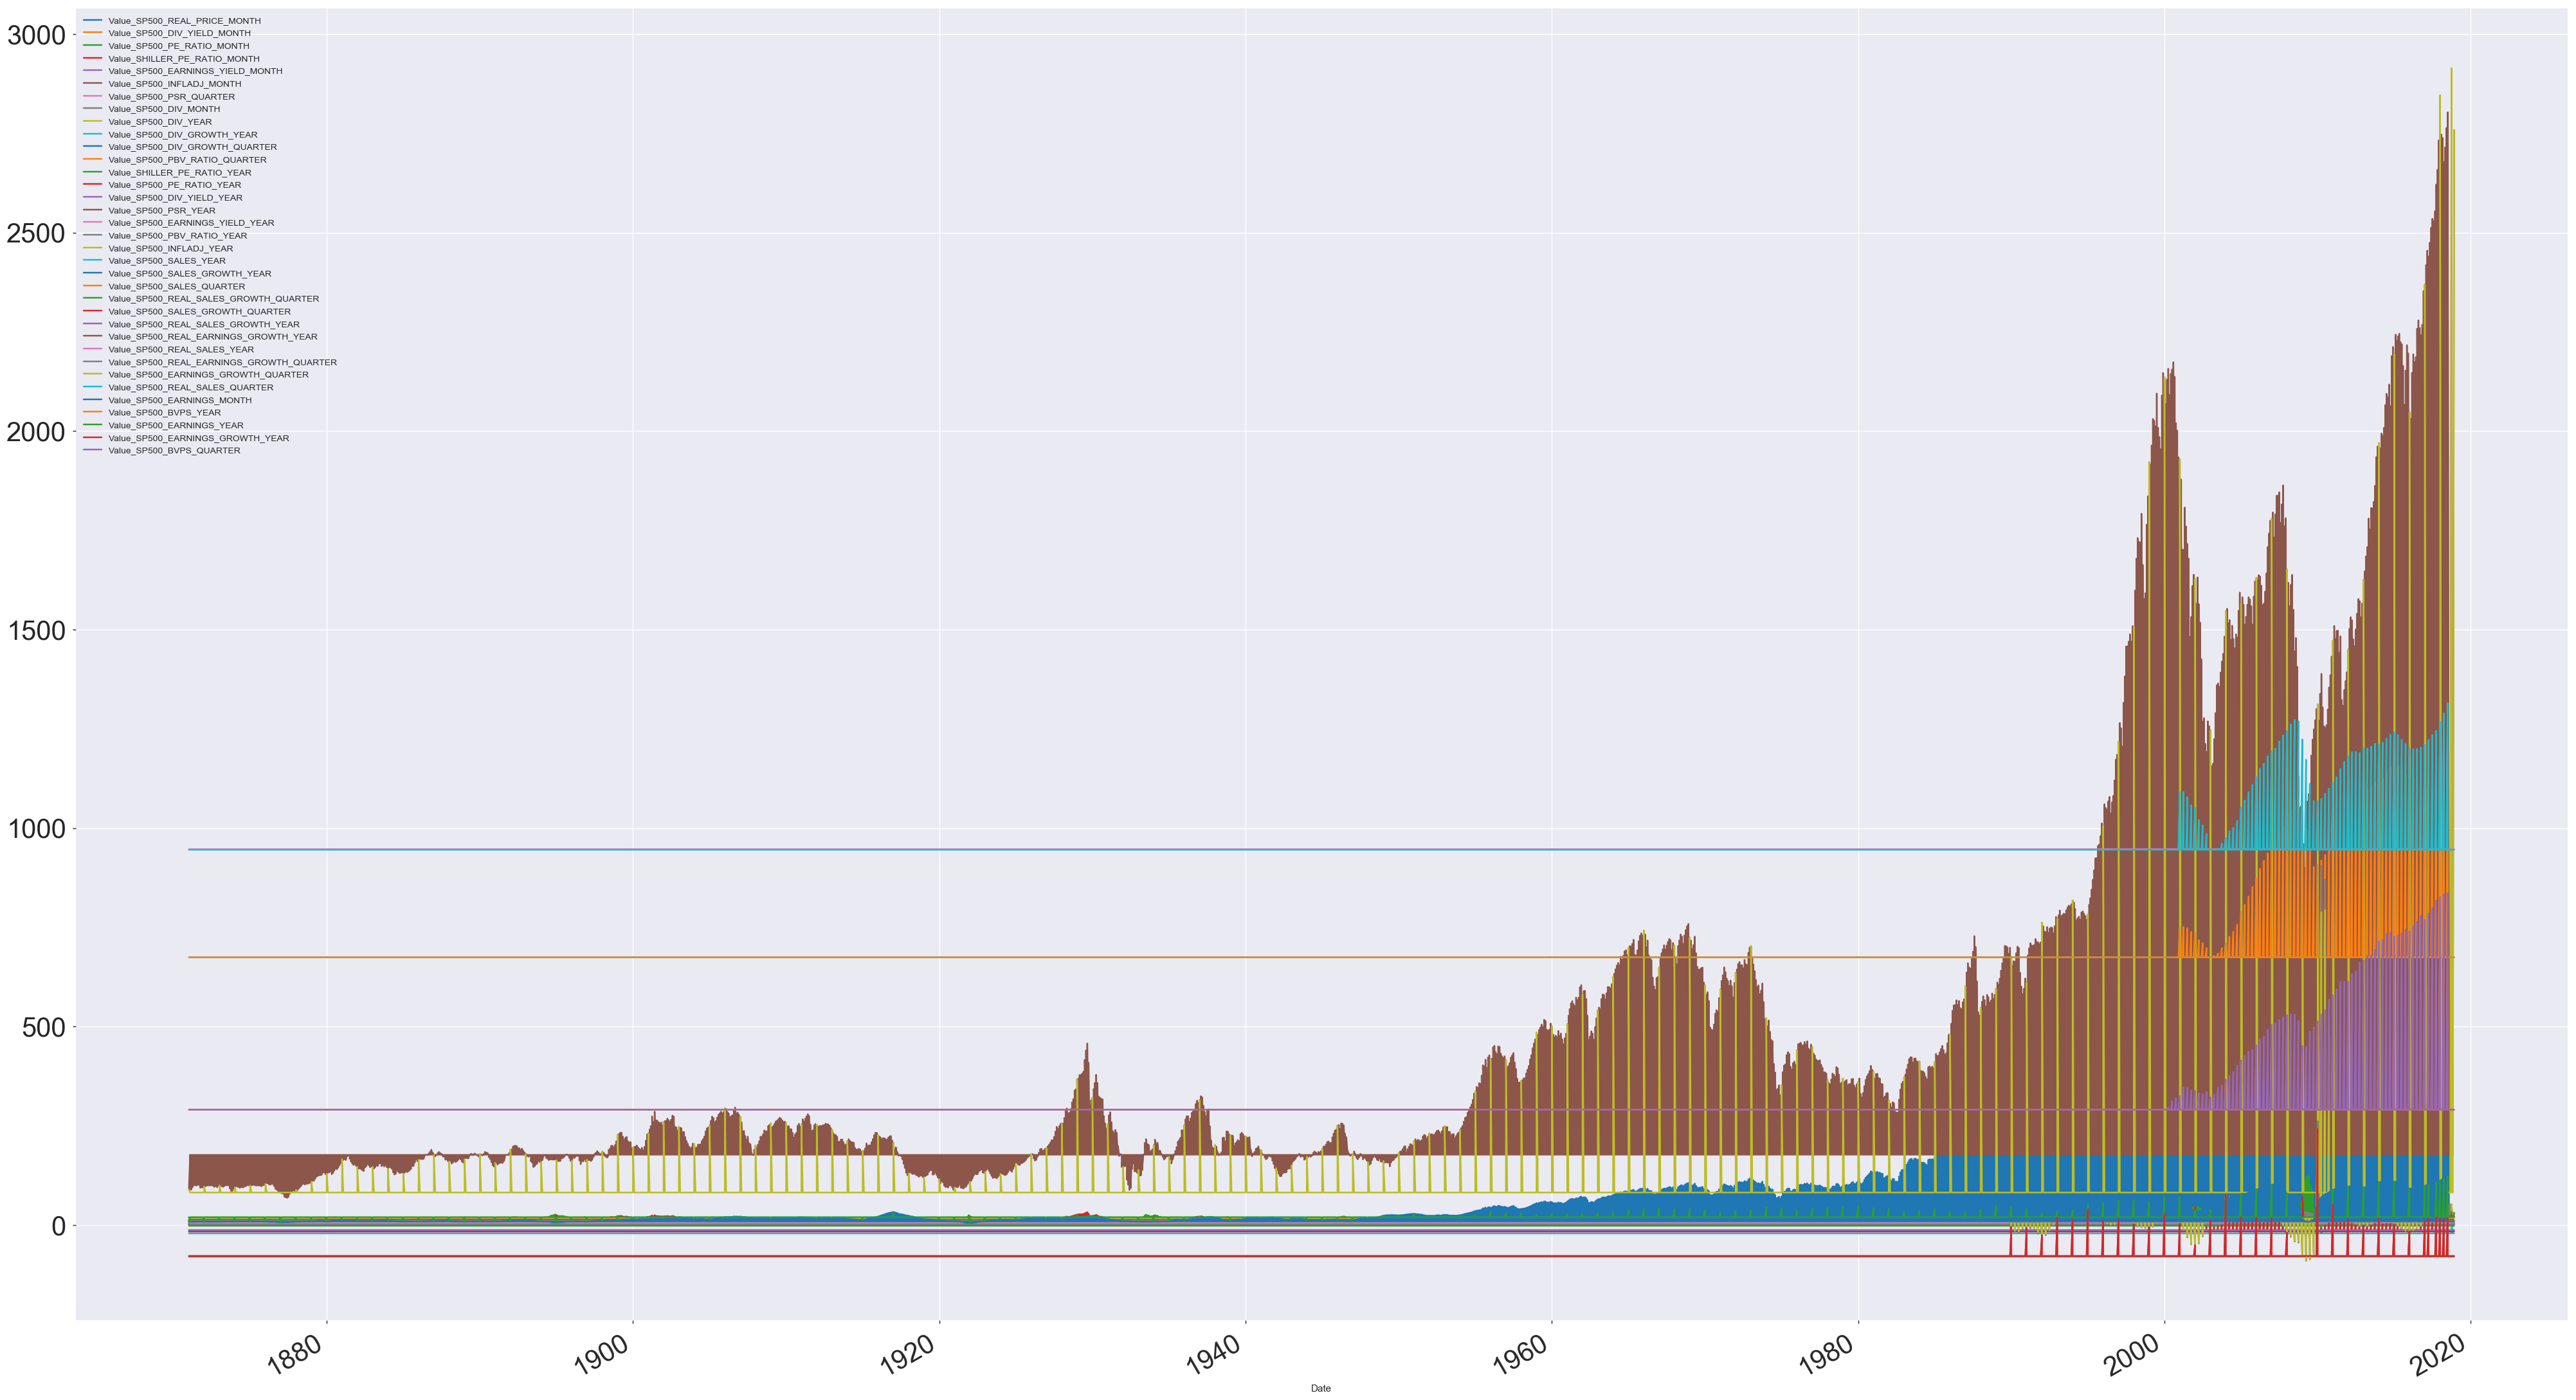

In [37]:
df_imputed.plot(figsize=(50,30),fontsize=30)

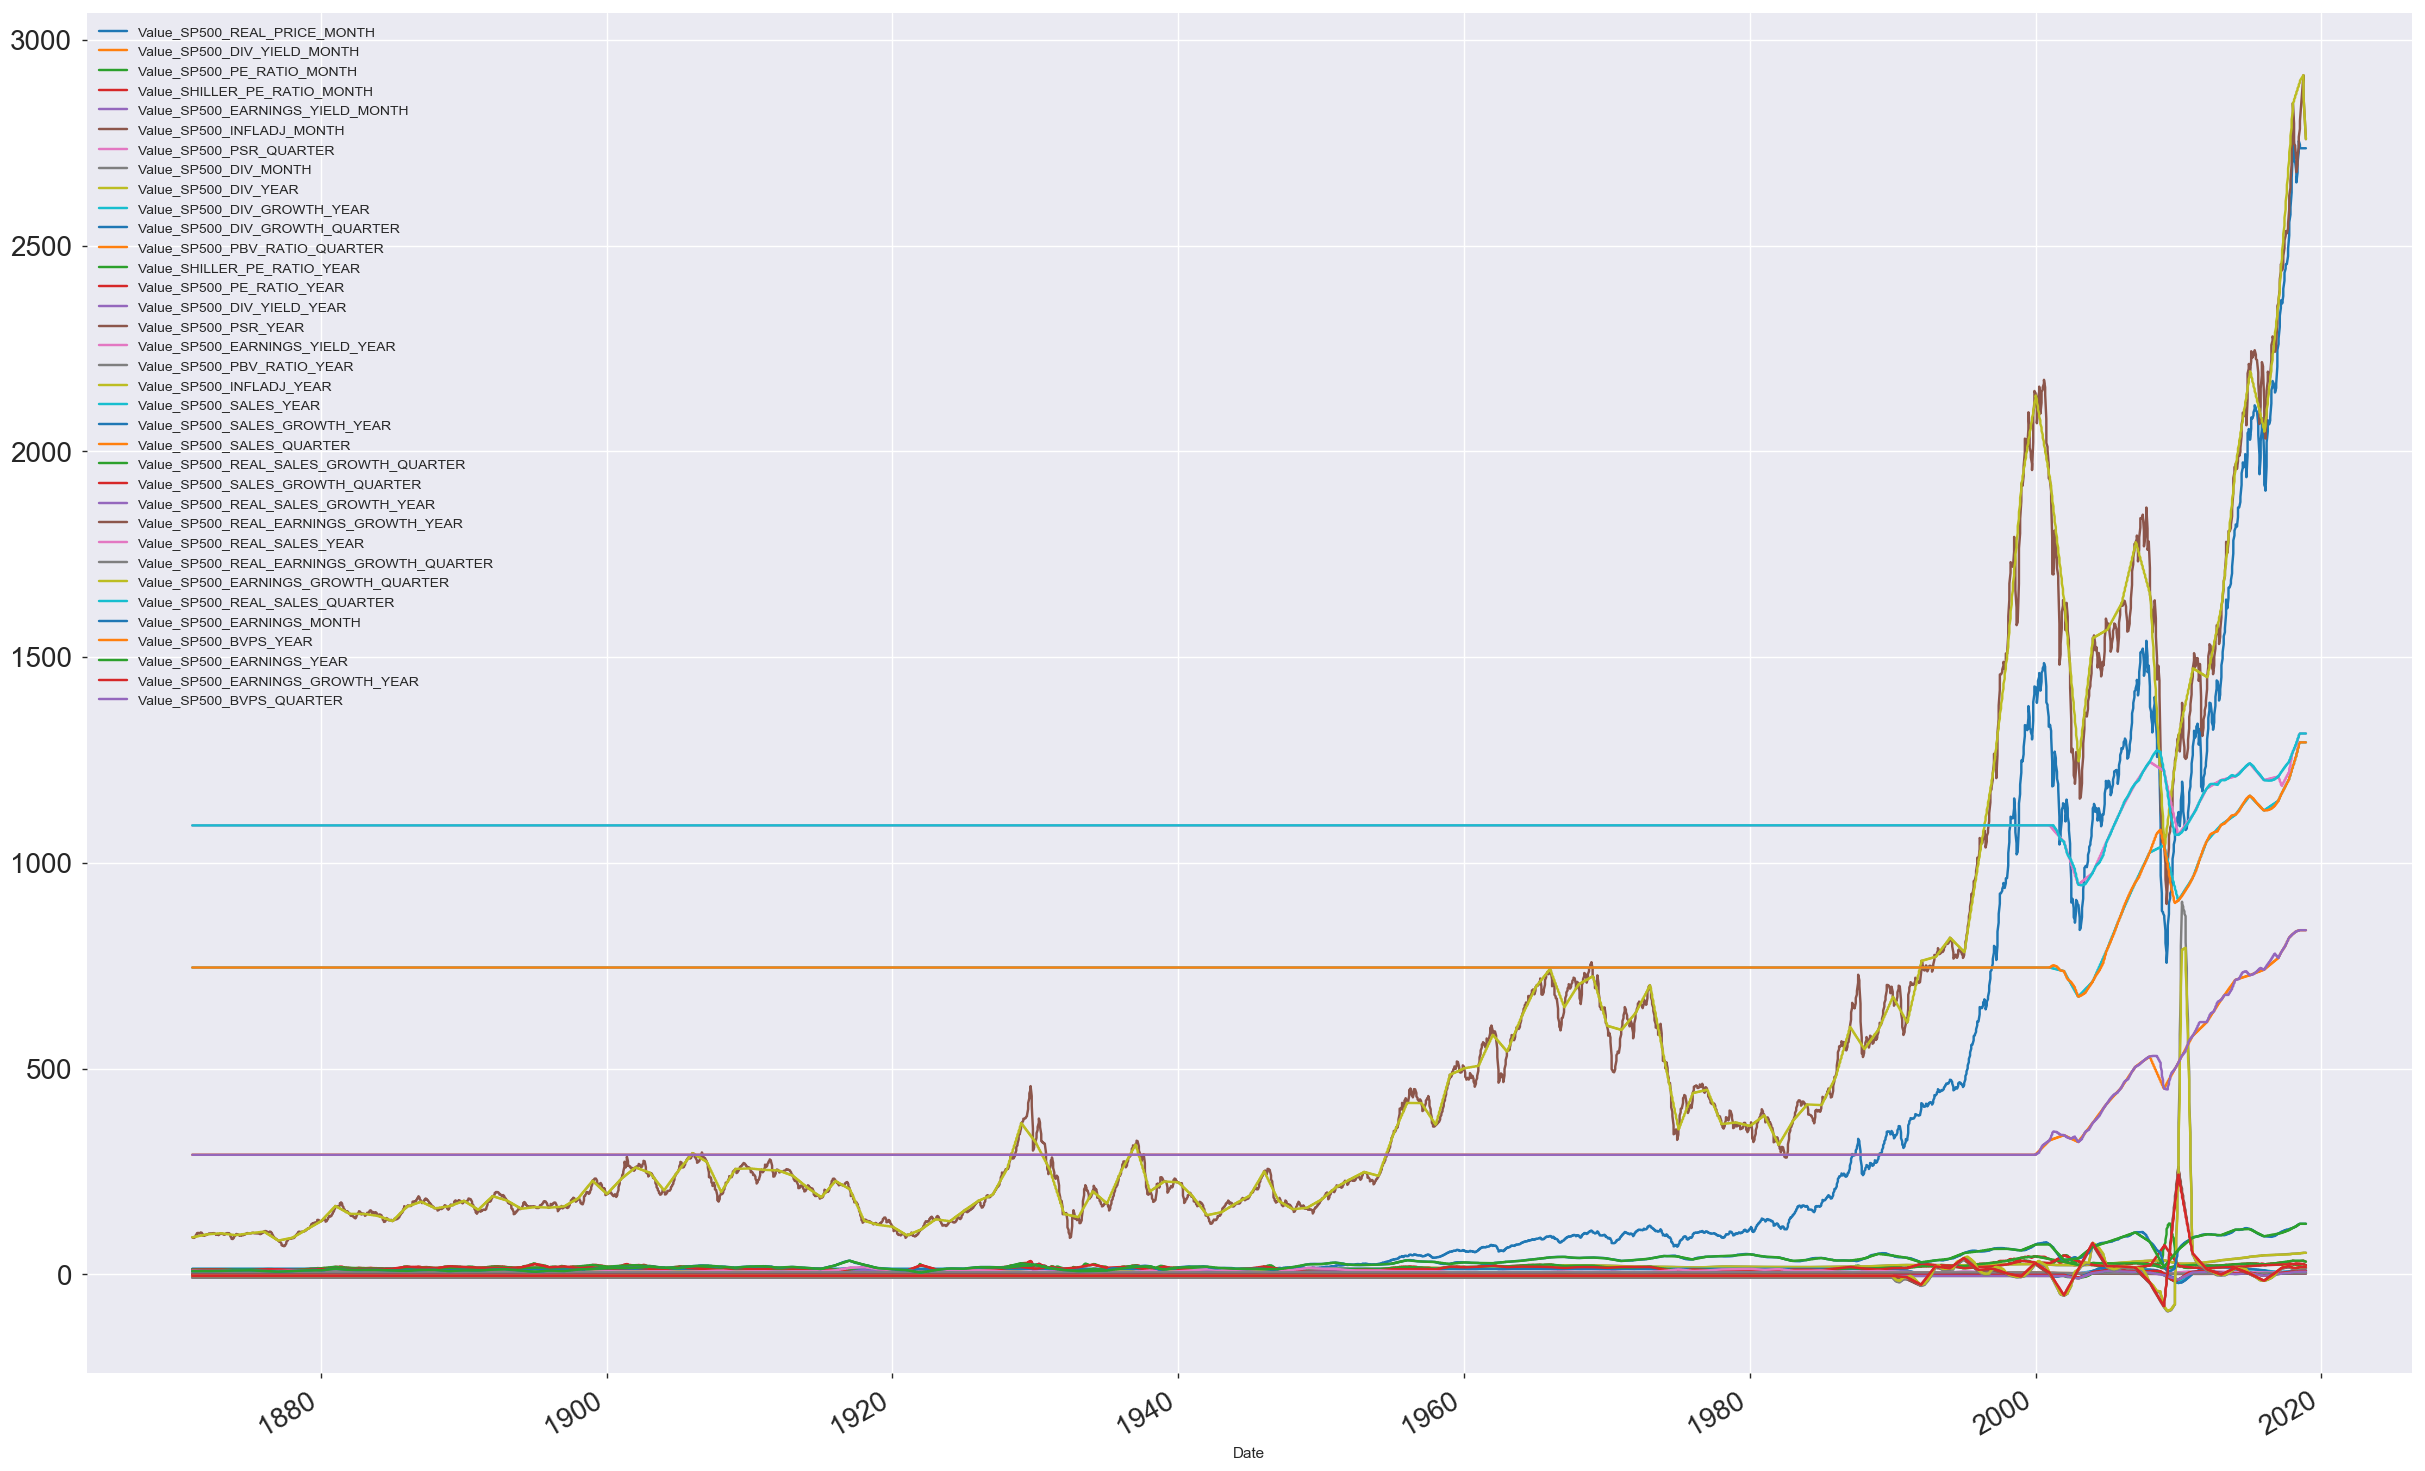

In [38]:
df_interpolate.plot(figsize=(30,20),fontsize=20)

# Analysis on interpolation and imputation.

    linear Interpolation on missing values looks promising and there is better corelation between variables of the dataset. Imputation has not shown better corelation between variables. I would use interpolation dataframe for further analysis.

# Write dfs to csv files for further reference.

save df, df_imputed and df_iterpolated to csv file.

In [39]:
#Write dfs to csv file.
df.to_csv('SandP500_Index_Master.csv',index=False)
df_imputed.to_csv('SandP500_Index_df_imputed.csv',index=False)
df_interpolate.to_csv('SandP500_Index_df_Interpolated.csv',index=False)

# Feature Scaling
    
    Apply StandardScaler() to the imputed df and interpolated df to normalize feature values.

In [40]:
# Apply feature scaling on all values to the entire numerical dataframe.define function
def Apply_Standard_Scaler(df):
    '''
    This funtion applies StandardScaler() to columns/features of a given dataframe.
    IN- a pandas dataframe
    OUT - df_scaled_features dataframe of scaled features.
    scaler - StandardScaler() object.    
    '''
    scaler = StandardScaler()
    scaled_features = StandardScaler().fit_transform(df.values)
    df_scaled_features = pd.DataFrame(scaled_features,index=df.index,columns = df.columns)
    #df_scaled_features.describe()
    
    return df_scaled_features, scaler

In [41]:
print ('Number of columns present in imputed and interpolated datasets are : {} & {}'.format (
    len(df_imputed.columns),len(df_interpolate.columns)))

Number of columns present in imputed and interpolated datasets are : 35 & 35


In [42]:
# Apply standard scaling function to both dfs and return scaled df.
df_scaled_features_imputed, scaler_df_imputed = Apply_Standard_Scaler(df_imputed)
df_scaled_features_interpolation, scaler_df_interpolate = Apply_Standard_Scaler(df_interpolate)

# Apply Principal Component Analysis (PCA) for feature selection

    Apply PCA feature extraction analysis to find groups of features with highest and lowest variance.

In [43]:
#function to apply PCA feature scaling
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instance of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(25, 10))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    #print (ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
     
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    

# Apply PCA to the data for all features
def Apply_PCA(df_scaled_features,n_components):
    '''
    This function would create a PCA object in scikit-learn with n_components and apply fit_transform function of PCA on scaled features df.
    This function internally calls another 'scree_plot' function to create a chart of feature variance.
    IN - 
    df_scaled_features - numerically scaled dataframe.
    n_components - n number of components for PCA feature analysis
    
    Output- Returns PCA object with provided n_components
    '''
    pca = PCA(n_components)
    pca_scaled_features = pca.fit_transform(df_scaled_features)
    scree_plot(pca)
    
    return pca


# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
def sorted_weights(pca, ix, dataset):
    """
    Docstring- map the weights and components from PCA analysis.
    Input parameters-
    Input - pca initialized model
    ix = index number of first set of components.
    dataset = a dataframe of scaled features
    
    Output- A Tuple of features with variance.
    Prints a bar chart with feature names and related variance.
    """
    a1 = pca.components_[ix]
    a2 = dataset.keys().values
    a = list(zip(a1, a2))
    a.sort(key=lambda tup: tup[0])
    x_labels = [val[0] for val in a]
    y_labels = [val[1] for val in a]
    plt.Figure(figsize=(20, 12))
    ax = pd.Series(x_labels).plot(kind='bar')
    ax.set_xticklabels(y_labels)
    rects = ax.patches
    # for rect, label in zip(rects, x_labels):
    #     height = rect.get_height()
    #     ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    return a

    Visualize PCA feature extraction and variance for imputed and interpolated dfs

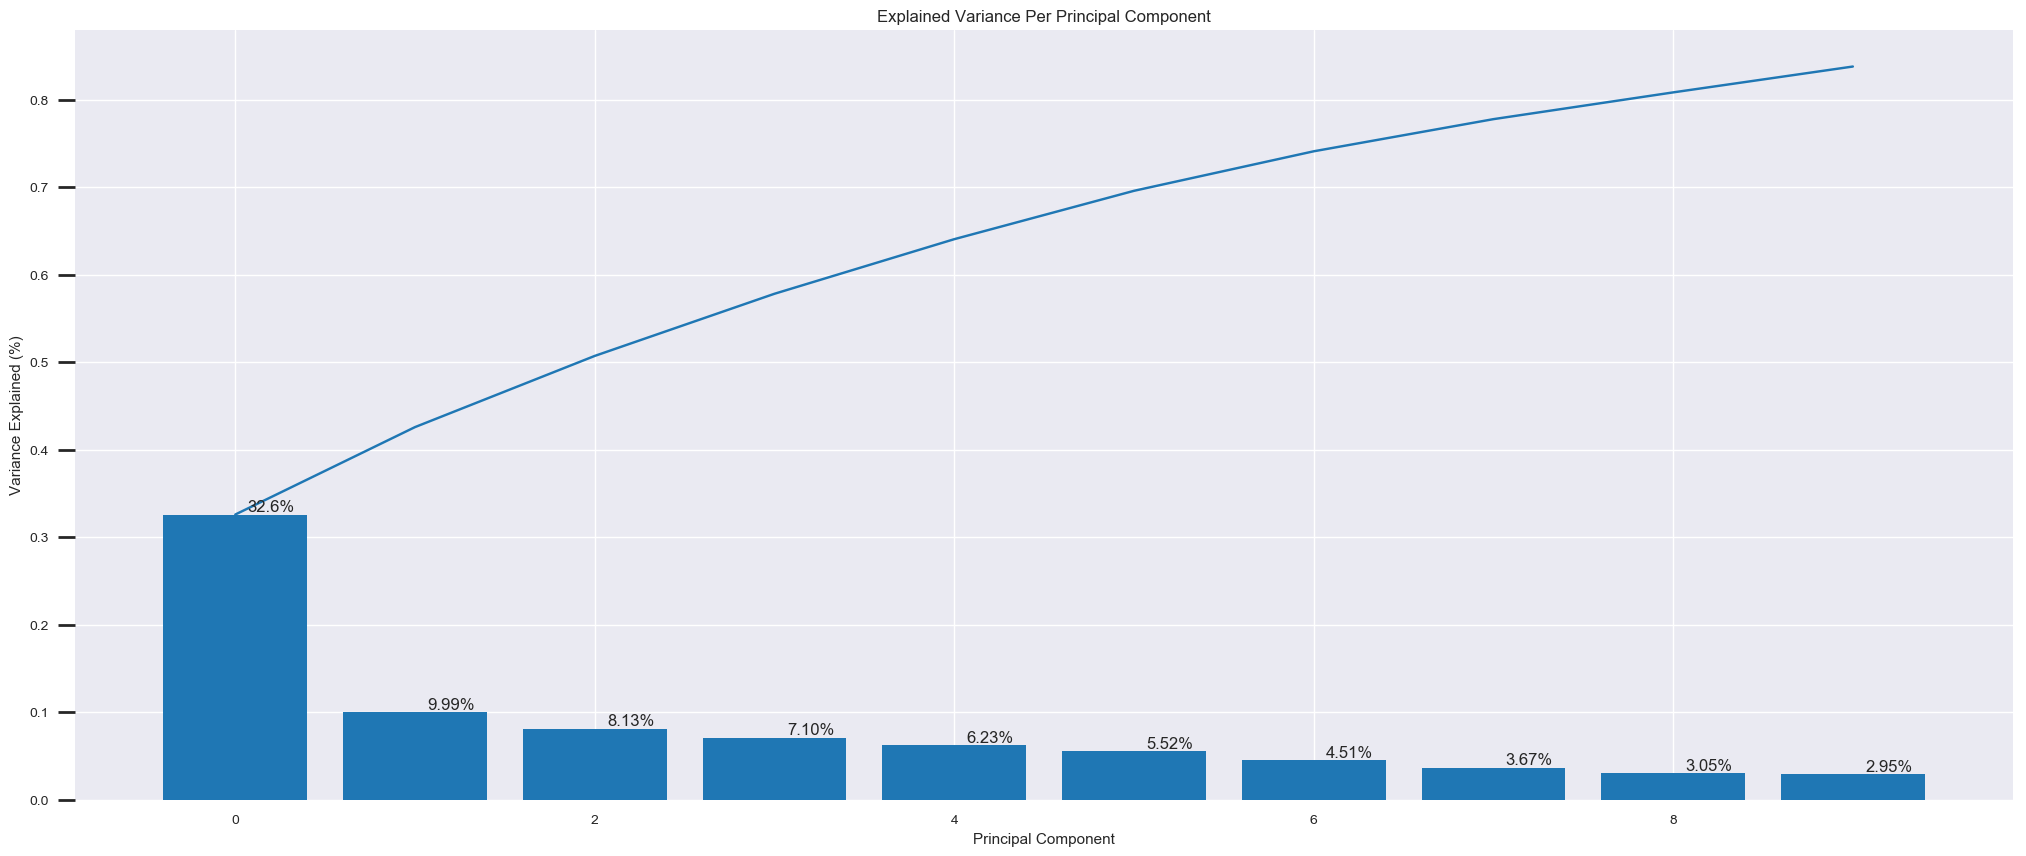

In [44]:
#Apply PCA for all features except target output.
pca_imputed = Apply_PCA(df_scaled_features_imputed.drop(['Value_SP500_REAL_PRICE_MONTH'],axis=1),n_components=10)

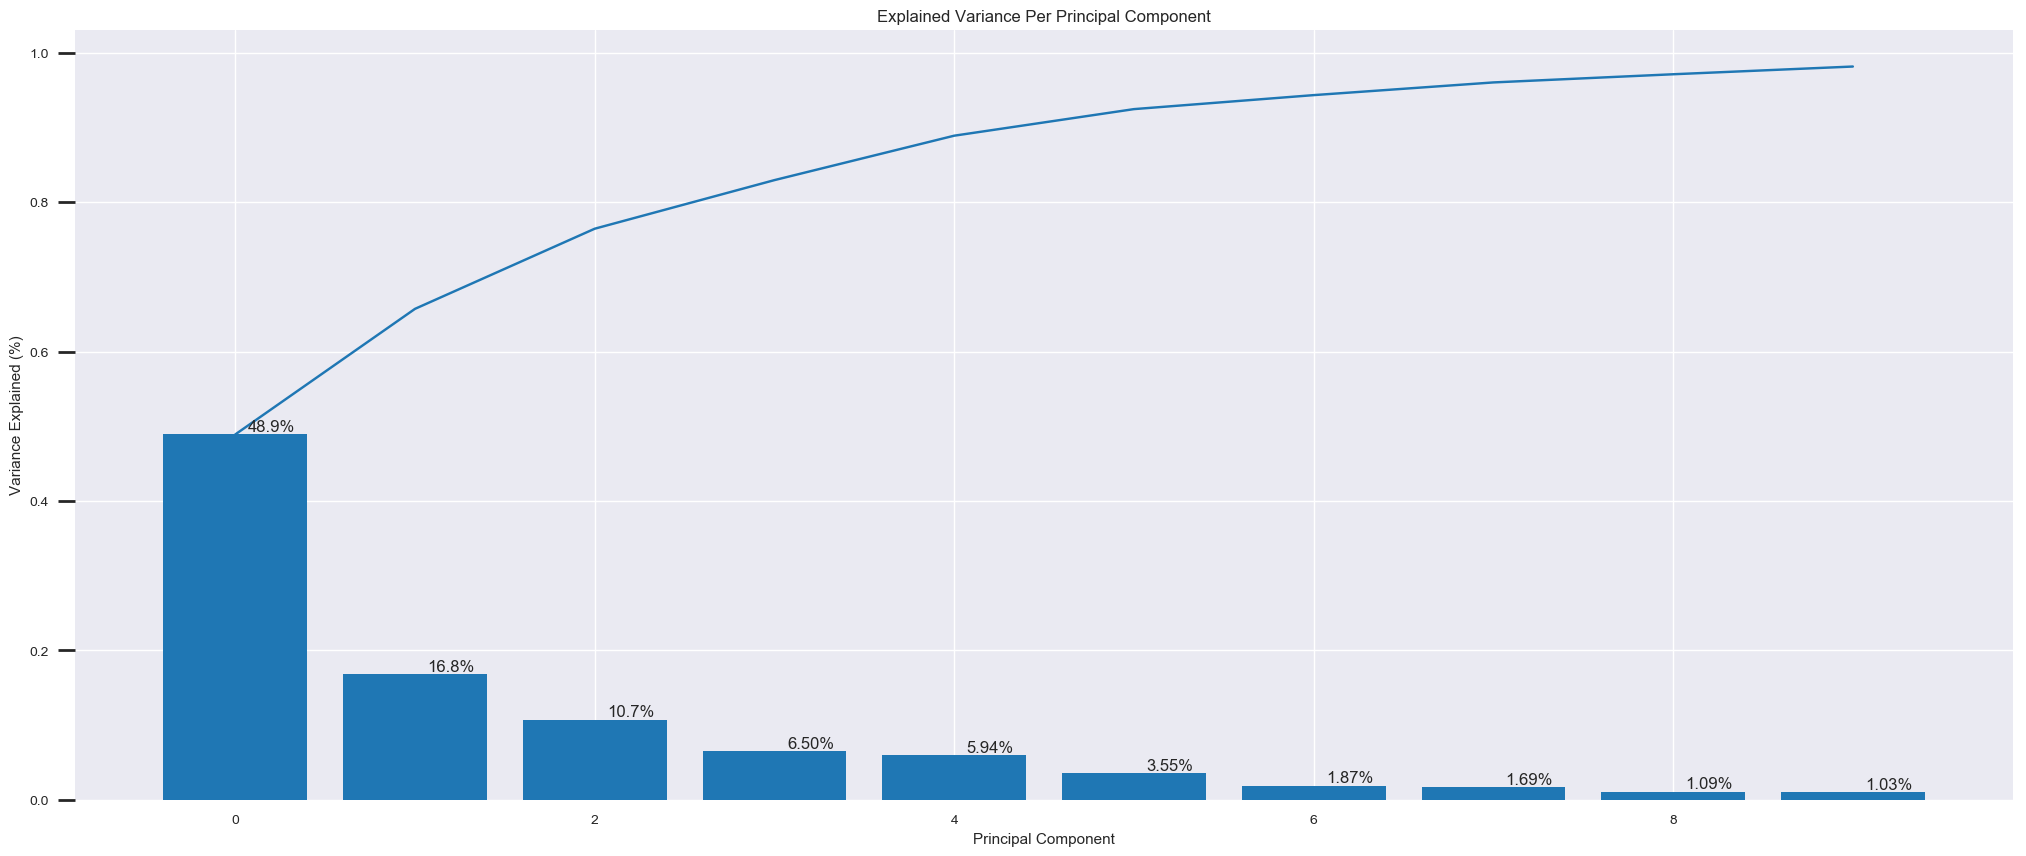

In [45]:
#Apply PCA for all features except target output.
pca_interpolated = Apply_PCA(df_scaled_features_interpolation.drop(['Value_SP500_REAL_PRICE_MONTH'],axis=1),n_components=10)

    Visualize weights of features for first group of extracted features with highest variance

In [46]:
#Frequency of features with highest variance
def Print_PCAfeatures_graph(df,a,n):
    '''
    Function to print PCA features in line chart with top n lowest variance or top n highest variance for a dataframe.
    IN- 
    df- dataframe on which PCA analysis was done.
    a - result from 'sorted_weights' function. A sequence of 2-d array with sorted weights of features.
    n- number of features required to be printed in the chart. Negative (-n) shall show features with maximum variance while 
    positive n would show features with lowest variance
    '''    
    groups = []
    for i in range(len(a)):
        groups.append(a[i][1])
    
    #Slice 1-D array appropriately
    if n < 0:
        groups = groups[n:]
    else:
        groups = groups[:n]
        
    plt.figure()
    i = 1
    for group in groups:
        plt.subplot(len(groups), 1, i)
        plt.plot(df[group].values)
        plt.title(group, y=0.5, loc='center')
        i += 1

    plt.show()
    
    return groups

In [47]:
a = sorted_weights(pca_imputed,1,df_scaled_features_imputed)

In [48]:
#print chart with top 5 features with maximum variance
Print_PCAfeatures_graph(df_imputed,a,-5)

['Value_SHILLER_PE_RATIO_YEAR',
 'Value_SP500_EARNINGS_YIELD_MONTH',
 'Value_SP500_PE_RATIO_MONTH',
 'Value_SP500_PBV_RATIO_YEAR',
 'Value_SP500_PBV_RATIO_QUARTER']

In [49]:
#print chart with top 5 features with lowest variance
Print_PCAfeatures_graph(df_imputed,a,5)

['Value_SHILLER_PE_RATIO_MONTH',
 'Value_SP500_REAL_SALES_QUARTER',
 'Value_SP500_PSR_QUARTER',
 'Value_SP500_PSR_YEAR',
 'Value_SP500_REAL_SALES_GROWTH_QUARTER']

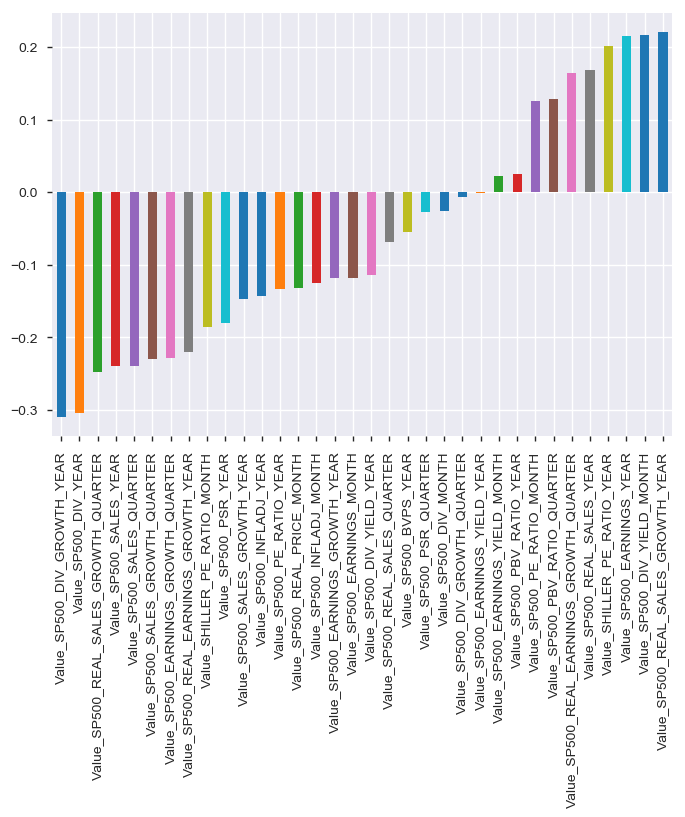

In [50]:
b = sorted_weights(pca_interpolated,1,df_scaled_features_interpolation)

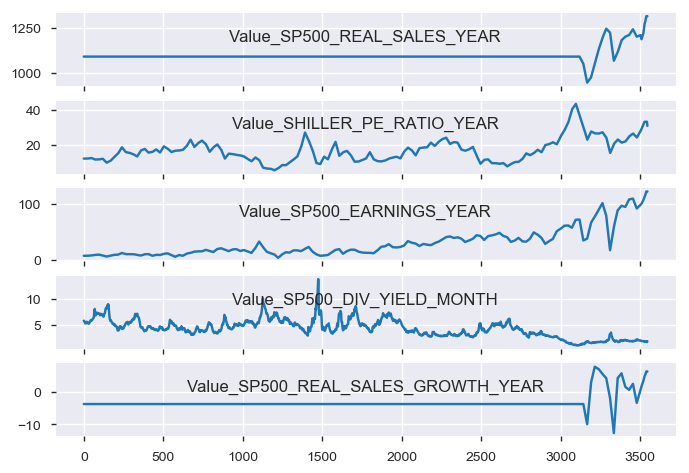

['Value_SP500_REAL_SALES_YEAR',
 'Value_SHILLER_PE_RATIO_YEAR',
 'Value_SP500_EARNINGS_YEAR',
 'Value_SP500_DIV_YIELD_MONTH',
 'Value_SP500_REAL_SALES_GROWTH_YEAR']

In [51]:
#print chart with top 5 features with maximum variance
Print_PCAfeatures_graph(df_interpolate,b,-5)

In [52]:
#print chart with top 5 features with lowest variance
Print_PCAfeatures_graph(df_interpolate,b,5)

['Value_SP500_DIV_GROWTH_YEAR',
 'Value_SP500_DIV_YEAR',
 'Value_SP500_REAL_SALES_GROWTH_QUARTER',
 'Value_SP500_SALES_YEAR',
 'Value_SP500_SALES_QUARTER']

# Split dataset into Train and Test set.

    Split 80% of dataset into train and 20% into test based on chronological order because its a timeseries. Avoid look-ahead bias by doing this.

In [53]:
def Create_Training_Test_Dataset(df,split_percent,Linear_regr):
    '''
    This function would split, slice and create training and test datasets. 
    IN- df- a dataframe from which training and test dataset needs to slice.
    split_percent - split percent for training and test dataset.
    Linear_regr - A flag to split between dataset for linear regression object or LSTM network. Works for this project only.
    
    OUT- X_train, Y_train, X_test, Y_test
    
    '''
       
    # Split the size into 80% and 20% based on rows.
    train_size = int(len(df) * split_percent)
    test_size = len(df) - train_size
    #print(train_size,test_size)
    print('Training and Test dataset is of size {} & {}'.format(train_size,test_size))
    
    #Slice the df into train and test df.
    train = df.iloc[0:train_size,:]
    test = df.iloc[train_size:len(df),:]
    #print(train.shape, test.shape)
    
    #Check for Linear Regression flag from user input. If false it would return dataset for LSTM neural network.
    if Linear_regr == 'False':
        #Create Training dataset
        temp_train = train.drop(['Value_SP500_REAL_PRICE_MONTH'],axis=1,inplace=False)
        X_train = temp_train.iloc[0:train_size,:]
        #X_train.head()
        Y_train = train.iloc[0:train_size,:1]
        #print(Y_train.head())
        #print(X_train.shape,Y_train.shape)
        #print(X_train.columns,Y_train.columns)
        print('Features size of X_train and training target Y_train shape is {} & {}'.format(X_train.shape,Y_train.shape))

        #Define Test dataset
        temp_test = test.drop(['Value_SP500_REAL_PRICE_MONTH'],axis=1,inplace=False)
        X_test = temp_test.iloc[0:test_size,:]
        #X_train.head()
        Y_test = test.iloc[0:test_size,:1]
        #print(Y_train.head())
        #print(X_test.shape,Y_test.shape)
        #print(X_test.columns,Y_test.columns)
        print('Features size of X_test and Test target Y_test shape is {} & {}'.format(X_test.shape,Y_test.shape))
        
    else:
        #Train dataset
        X_train = train['Value_SP500_REAL_PRICE_MONTH'][0:train_size]
        Y_train = train['Value_SP500_REAL_PRICE_MONTH'][0:test_size]
        print('Features size of X_train and training target Y_train shape is {} & {}'.format(X_train.shape,Y_train.shape))
            
        #Test dataset
        X_test = test['Value_SP500_REAL_PRICE_MONTH'][0:train_size]
        Y_test = test['Value_SP500_REAL_PRICE_MONTH'][0:test_size]
        print('Features size of X_test and Test target Y_test shape is {} & {}'.format(X_test.shape,Y_test.shape))
        

    return X_train, Y_train, X_test, Y_test
    
def Convert_dataset_nparray(X_train, Y_train, X_test, Y_test):
    '''
    This function would convert the training and test dataset to np.array.
    In- X_train, Y_train, X_test, Y_test
    
    OUT- np.array of X_train, Y_train, X_test, Y_test
    
    '''
    #Convert to np array as required for LSTM model.
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    #print(X_train.shape,Y_train.shape)
    print('Training dataset is converted to np.array with size {} & {}'.format(X_train.shape,Y_train.shape))

    #Convert test dataset to np.array.
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)
    #print(X_test.shape,Y_test.shape)
    print('Test dataset is converted to np.array with size {} & {}'.format(X_test.shape,Y_test.shape))
    
    return X_train, Y_train, X_test, Y_test

# Define and Fit LSTM model in keras

    Multivariate time-series prediction

In [54]:
from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.layers.embeddings import Embedding
from keras.models import Sequential
import time
from numpy import newaxis

Using TensorFlow backend.


In [55]:
# #Build Model
# model = Sequential()

# model.add(LSTM(input_dim=1,output_dim=50,return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(100,return_sequences=False))
# model.add(Dropout(0.2))

# model.add(Dense(output_dim=1))
# model.add(Activation('linear'))

# start = time.time()
# model.compile(loss='mse', optimizer='rmsprop')
# print ('compilation time : ', time.time() - start)

In [56]:
# #Build the model
# model = Sequential()
# model.add(LSTM(256,input_shape=(2837,34)))
# model.add(Dense(1))
# model.compile(optimizer='adam',loss='mse')
# #Reshape data for (Sample,Timestep,Features) 
# #X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
# #X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
# #Fit model with history to check for overfitting
# #history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)

In [57]:
#model.fit(X_train,Y_train,batch_size=128,epochs=10,validation_split=0.05)

In [58]:
# model = Sequential([
#     Dense(32, input_shape=(2837,34)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# #Compile
# # For a mean squared error regression problem
# model.compile(optimizer='rmsprop',
#               loss='mse')

In [59]:
#Use real data
X_train, Y_train, X_test, Y_test = Create_Training_Test_Dataset(df=df_imputed, split_percent=0.8, Linear_regr='False')
X_train, Y_train, X_test, Y_test = Convert_dataset_nparray(X_train, Y_train, X_test, Y_test)

Training and Test dataset is of size 2837 & 710
Features size of X_train and training target Y_train shape is (2837, 34) & (2837, 1)
Features size of X_test and Test target Y_test shape is (710, 34) & (710, 1)
Training dataset is converted to np.array with size (2837, 34) & (2837, 1)
Test dataset is converted to np.array with size (710, 34) & (710, 1)


In [60]:
#apply scaling
scaler_df_imputed = StandardScaler()
scaled_features = scaler_df_imputed.fit_transform(df_interpolate.values)
df_scaled_features_interpol = pd.DataFrame(scaled_features,index=df_interpolate.index,columns = df_interpolate.columns)
#df_scaled_features.describe()

In [61]:
#Split master dataframe into training and test datasets
X_train, Y_train, X_test, Y_test = Create_Training_Test_Dataset(df=df_scaled_features_interpol, split_percent=0.9, Linear_regr='False')

X_train, Y_train, X_test, Y_test = Convert_dataset_nparray(X_train, Y_train, X_test, Y_test)

Training and Test dataset is of size 3192 & 355
Features size of X_train and training target Y_train shape is (3192, 34) & (3192, 1)
Features size of X_test and Test target Y_test shape is (355, 34) & (355, 1)
Training dataset is converted to np.array with size (3192, 34) & (3192, 1)
Test dataset is converted to np.array with size (355, 34) & (355, 1)


In [62]:
#Shape training data.
#the inputs (X) are reshaped into the 3D format expected by LSTM, namely [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0],1,34))
#Y_train = Y_train.reshape((Y_train.shape[0],1,1)) #Do not reshape it. 
print(X_train.shape,Y_train.shape)
print(X_train.shape[1],X_train.shape[2])
#Shape test dataset correctly for LSTM predict.
X_test = X_test.reshape((X_test.shape[0],1,34))
#Y_test = Y_test.reshape((Y_test.shape[0],Y_test.shape[1],1))
print(X_test.shape,Y_test.shape)
print('input shape : ', X_test.shape[1],X_test.shape[2])

(3192, 1, 34) (3192, 1)
1 34
(355, 1, 34) (355, 1)
input shape :  1 34


In [63]:
#Design network for mean squared error regression problem
model = Sequential()
model.add(LSTM(512, input_shape=(X_train.shape[1], X_train.shape[2])))
Activation('relu')
model.add(Dense(1))
Activation('softmax')

# Compiling the model using mean square error loss, and Adam optimizer.
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy'])

In [64]:
# max_features = 1024

# model = Sequential()
# model.add(Embedding(max_features, output_dim=256))
# model.add(LSTM(128))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

In [65]:
# fit network with epochs
history = model.fit(X_train, Y_train, epochs=1000, batch_size=4, validation_data=(X_train, Y_train), verbose=2, shuffle=False)

Train on 3192 samples, validate on 3192 samples
Epoch 1/1000
 - 29s - loss: 0.0091 - acc: 0.0000e+00 - val_loss: 0.1256 - val_acc: 0.0000e+00
Epoch 2/1000
 - 27s - loss: 0.0066 - acc: 0.0000e+00 - val_loss: 0.0912 - val_acc: 0.0000e+00
Epoch 3/1000
 - 27s - loss: 0.0053 - acc: 0.0000e+00 - val_loss: 0.4443 - val_acc: 0.0000e+00
Epoch 4/1000
 - 29s - loss: 0.0106 - acc: 0.0000e+00 - val_loss: 0.0551 - val_acc: 0.0000e+00
Epoch 5/1000
 - 31s - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.1019 - val_acc: 0.0000e+00
Epoch 6/1000
 - 29s - loss: 0.0064 - acc: 0.0000e+00 - val_loss: 0.0887 - val_acc: 0.0000e+00
Epoch 7/1000
 - 34s - loss: 0.0049 - acc: 0.0000e+00 - val_loss: 0.1333 - val_acc: 0.0000e+00
Epoch 8/1000
 - 31s - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.0610 - val_acc: 0.0000e+00
Epoch 9/1000
 - 31s - loss: 0.0047 - acc: 0.0000e+00 - val_loss: 0.0530 - val_acc: 0.0000e+00
Epoch 10/1000
 - 30s - loss: 0.0048 - acc: 0.0000e+00 - val_loss: 0.0387 - val_acc: 0.0000e+00
Epoch 11/10

Epoch 87/1000
 - 28s - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 88/1000
 - 30s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0264 - val_acc: 0.0000e+00
Epoch 89/1000
 - 29s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0054 - val_acc: 0.0000e+00
Epoch 90/1000
 - 30s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0207 - val_acc: 0.0000e+00
Epoch 91/1000
 - 35s - loss: 0.0067 - acc: 0.0000e+00 - val_loss: 0.0414 - val_acc: 0.0000e+00
Epoch 92/1000
 - 36s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0178 - val_acc: 0.0000e+00
Epoch 93/1000
 - 33s - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0106 - val_acc: 0.0000e+00
Epoch 94/1000
 - 34s - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0282 - val_acc: 0.0000e+00
Epoch 95/1000
 - 32s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 96/1000
 - 29s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 97/1000
 - 31s - loss: 0.0013 - acc: 0.0000e

 - 41s - loss: 9.8421e-04 - acc: 0.0000e+00 - val_loss: 0.0168 - val_acc: 0.0000e+00
Epoch 173/1000
 - 42s - loss: 0.0021 - acc: 0.0000e+00 - val_loss: 0.0152 - val_acc: 0.0000e+00
Epoch 174/1000
 - 42s - loss: 0.0037 - acc: 0.0000e+00 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 175/1000
 - 43s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0069 - val_acc: 0.0000e+00
Epoch 176/1000
 - 43s - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 177/1000
 - 46s - loss: 0.0014 - acc: 0.0000e+00 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 178/1000
 - 42s - loss: 8.3196e-04 - acc: 0.0000e+00 - val_loss: 0.0102 - val_acc: 0.0000e+00
Epoch 179/1000
 - 44s - loss: 8.9691e-04 - acc: 0.0000e+00 - val_loss: 0.0134 - val_acc: 0.0000e+00
Epoch 180/1000
 - 46s - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 0.0127 - val_acc: 0.0000e+00
Epoch 181/1000
 - 42s - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 0.0037 - val_acc: 0.0000e+00
Epoch 182/1000
 - 45s - loss: 8.9410e-04 - 

Epoch 257/1000
 - 32s - loss: 9.3484e-04 - acc: 0.0000e+00 - val_loss: 0.0144 - val_acc: 0.0000e+00
Epoch 258/1000
 - 30s - loss: 0.0013 - acc: 0.0000e+00 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 259/1000
 - 29s - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 0.0069 - val_acc: 0.0000e+00
Epoch 260/1000
 - 30s - loss: 0.0012 - acc: 0.0000e+00 - val_loss: 0.0080 - val_acc: 0.0000e+00
Epoch 261/1000
 - 29s - loss: 0.0012 - acc: 0.0000e+00 - val_loss: 0.0229 - val_acc: 0.0000e+00
Epoch 262/1000
 - 30s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0053 - val_acc: 0.0000e+00
Epoch 263/1000
 - 29s - loss: 7.5471e-04 - acc: 0.0000e+00 - val_loss: 0.0061 - val_acc: 0.0000e+00
Epoch 264/1000
 - 30s - loss: 8.9111e-04 - acc: 0.0000e+00 - val_loss: 0.0142 - val_acc: 0.0000e+00
Epoch 265/1000
 - 29s - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 0.0048 - val_acc: 0.0000e+00
Epoch 266/1000
 - 30s - loss: 0.0014 - acc: 0.0000e+00 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 267/1000
 - 29s - loss

Epoch 341/1000
 - 28s - loss: 0.0010 - acc: 0.0000e+00 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 342/1000
 - 29s - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 343/1000
 - 28s - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 0.0042 - val_acc: 0.0000e+00
Epoch 344/1000
 - 28s - loss: 6.8252e-04 - acc: 0.0000e+00 - val_loss: 0.0050 - val_acc: 0.0000e+00
Epoch 345/1000
 - 28s - loss: 8.6755e-04 - acc: 0.0000e+00 - val_loss: 0.0051 - val_acc: 0.0000e+00
Epoch 346/1000
 - 28s - loss: 7.5711e-04 - acc: 0.0000e+00 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 347/1000
 - 28s - loss: 6.4496e-04 - acc: 0.0000e+00 - val_loss: 0.0042 - val_acc: 0.0000e+00
Epoch 348/1000
 - 28s - loss: 7.1869e-04 - acc: 0.0000e+00 - val_loss: 0.0104 - val_acc: 0.0000e+00
Epoch 349/1000
 - 28s - loss: 8.7879e-04 - acc: 0.0000e+00 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 350/1000
 - 29s - loss: 0.0012 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 351/1000
 

Epoch 424/1000
 - 31s - loss: 7.1214e-04 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 425/1000
 - 31s - loss: 5.5002e-04 - acc: 0.0000e+00 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 426/1000
 - 28s - loss: 0.0018 - acc: 0.0000e+00 - val_loss: 0.0059 - val_acc: 0.0000e+00
Epoch 427/1000
 - 29s - loss: 7.2848e-04 - acc: 0.0000e+00 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 428/1000
 - 28s - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 0.0134 - val_acc: 0.0000e+00
Epoch 429/1000
 - 29s - loss: 7.4460e-04 - acc: 0.0000e+00 - val_loss: 0.0051 - val_acc: 0.0000e+00
Epoch 430/1000
 - 28s - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 431/1000
 - 29s - loss: 7.0243e-04 - acc: 0.0000e+00 - val_loss: 0.0182 - val_acc: 0.0000e+00
Epoch 432/1000
 - 28s - loss: 0.0013 - acc: 0.0000e+00 - val_loss: 0.0213 - val_acc: 0.0000e+00
Epoch 433/1000
 - 29s - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 0.0053 - val_acc: 0.0000e+00
Epoch 434/1000
 - 28

 - 27s - loss: 0.0010 - acc: 0.0000e+00 - val_loss: 0.0296 - val_acc: 0.0000e+00
Epoch 508/1000
 - 28s - loss: 9.6460e-04 - acc: 0.0000e+00 - val_loss: 0.0283 - val_acc: 0.0000e+00
Epoch 509/1000
 - 28s - loss: 8.6968e-04 - acc: 0.0000e+00 - val_loss: 0.0053 - val_acc: 0.0000e+00
Epoch 510/1000
 - 28s - loss: 6.6351e-04 - acc: 0.0000e+00 - val_loss: 0.0035 - val_acc: 0.0000e+00
Epoch 511/1000
 - 28s - loss: 5.8761e-04 - acc: 0.0000e+00 - val_loss: 0.0149 - val_acc: 0.0000e+00
Epoch 512/1000
 - 28s - loss: 5.9657e-04 - acc: 0.0000e+00 - val_loss: 0.0129 - val_acc: 0.0000e+00
Epoch 513/1000
 - 28s - loss: 6.2899e-04 - acc: 0.0000e+00 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 514/1000
 - 28s - loss: 9.7886e-04 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 515/1000
 - 28s - loss: 7.2761e-04 - acc: 0.0000e+00 - val_loss: 0.0097 - val_acc: 0.0000e+00
Epoch 516/1000
 - 28s - loss: 3.7177e-04 - acc: 0.0000e+00 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 517/1000
 - 2

Epoch 590/1000
 - 29s - loss: 0.0010 - acc: 0.0000e+00 - val_loss: 0.0154 - val_acc: 0.0000e+00
Epoch 591/1000
 - 28s - loss: 5.1623e-04 - acc: 0.0000e+00 - val_loss: 0.0043 - val_acc: 0.0000e+00
Epoch 592/1000
 - 29s - loss: 5.6960e-04 - acc: 0.0000e+00 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 593/1000
 - 28s - loss: 4.5701e-04 - acc: 0.0000e+00 - val_loss: 0.0060 - val_acc: 0.0000e+00
Epoch 594/1000
 - 29s - loss: 8.9606e-04 - acc: 0.0000e+00 - val_loss: 0.0155 - val_acc: 0.0000e+00
Epoch 595/1000
 - 28s - loss: 0.0014 - acc: 0.0000e+00 - val_loss: 0.0055 - val_acc: 0.0000e+00
Epoch 596/1000
 - 28s - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0051 - val_acc: 0.0000e+00
Epoch 597/1000
 - 29s - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 0.0067 - val_acc: 0.0000e+00
Epoch 598/1000
 - 28s - loss: 5.0198e-04 - acc: 0.0000e+00 - val_loss: 0.0404 - val_acc: 0.0000e+00
Epoch 599/1000
 - 29s - loss: 7.2838e-04 - acc: 0.0000e+00 - val_loss: 0.0108 - val_acc: 0.0000e+00
Epoch 600/1000
 

Epoch 673/1000
 - 28s - loss: 7.7022e-04 - acc: 0.0000e+00 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 674/1000
 - 28s - loss: 4.6102e-04 - acc: 0.0000e+00 - val_loss: 0.0038 - val_acc: 0.0000e+00
Epoch 675/1000
 - 28s - loss: 5.6858e-04 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 676/1000
 - 27s - loss: 9.2675e-04 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 677/1000
 - 28s - loss: 3.8933e-04 - acc: 0.0000e+00 - val_loss: 0.0043 - val_acc: 0.0000e+00
Epoch 678/1000
 - 27s - loss: 6.2614e-04 - acc: 0.0000e+00 - val_loss: 0.0045 - val_acc: 0.0000e+00
Epoch 679/1000
 - 28s - loss: 6.1547e-04 - acc: 0.0000e+00 - val_loss: 0.0037 - val_acc: 0.0000e+00
Epoch 680/1000
 - 28s - loss: 7.8850e-04 - acc: 0.0000e+00 - val_loss: 0.0061 - val_acc: 0.0000e+00
Epoch 681/1000
 - 28s - loss: 7.1105e-04 - acc: 0.0000e+00 - val_loss: 0.0039 - val_acc: 0.0000e+00
Epoch 682/1000
 - 28s - loss: 4.7096e-04 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00


Epoch 756/1000
 - 34s - loss: 9.4256e-04 - acc: 0.0000e+00 - val_loss: 0.0047 - val_acc: 0.0000e+00
Epoch 757/1000
 - 31s - loss: 9.7211e-04 - acc: 0.0000e+00 - val_loss: 0.0177 - val_acc: 0.0000e+00
Epoch 758/1000
 - 30s - loss: 5.0393e-04 - acc: 0.0000e+00 - val_loss: 0.0048 - val_acc: 0.0000e+00
Epoch 759/1000
 - 28s - loss: 3.5798e-04 - acc: 0.0000e+00 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 760/1000
 - 29s - loss: 5.2977e-04 - acc: 0.0000e+00 - val_loss: 0.0055 - val_acc: 0.0000e+00
Epoch 761/1000
 - 28s - loss: 9.4226e-04 - acc: 0.0000e+00 - val_loss: 0.0088 - val_acc: 0.0000e+00
Epoch 762/1000
 - 29s - loss: 3.8003e-04 - acc: 0.0000e+00 - val_loss: 0.0076 - val_acc: 0.0000e+00
Epoch 763/1000
 - 28s - loss: 7.0328e-04 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 764/1000
 - 29s - loss: 5.3667e-04 - acc: 0.0000e+00 - val_loss: 0.0037 - val_acc: 0.0000e+00
Epoch 765/1000
 - 28s - loss: 5.8807e-04 - acc: 0.0000e+00 - val_loss: 0.0045 - val_acc: 0.0000e+00


 - 37s - loss: 3.3970e-04 - acc: 0.0000e+00 - val_loss: 0.0150 - val_acc: 0.0000e+00
Epoch 839/1000
 - 32s - loss: 5.5919e-04 - acc: 0.0000e+00 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 840/1000
 - 33s - loss: 6.5940e-04 - acc: 0.0000e+00 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 841/1000
 - 31s - loss: 5.1663e-04 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 842/1000
 - 32s - loss: 5.5027e-04 - acc: 0.0000e+00 - val_loss: 0.0065 - val_acc: 0.0000e+00
Epoch 843/1000
 - 33s - loss: 7.4176e-04 - acc: 0.0000e+00 - val_loss: 0.0040 - val_acc: 0.0000e+00
Epoch 844/1000
 - 31s - loss: 0.0012 - acc: 0.0000e+00 - val_loss: 0.0146 - val_acc: 0.0000e+00
Epoch 845/1000
 - 31s - loss: 6.2546e-04 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 846/1000
 - 33s - loss: 3.8056e-04 - acc: 0.0000e+00 - val_loss: 0.0068 - val_acc: 0.0000e+00
Epoch 847/1000
 - 35s - loss: 0.0010 - acc: 0.0000e+00 - val_loss: 0.0042 - val_acc: 0.0000e+00
Epoch 848/1000
 - 37s -

Epoch 921/1000
 - 39s - loss: 6.9294e-04 - acc: 0.0000e+00 - val_loss: 0.0196 - val_acc: 0.0000e+00
Epoch 922/1000
 - 40s - loss: 7.3166e-04 - acc: 0.0000e+00 - val_loss: 0.0059 - val_acc: 0.0000e+00
Epoch 923/1000
 - 37s - loss: 5.1090e-04 - acc: 0.0000e+00 - val_loss: 0.0049 - val_acc: 0.0000e+00
Epoch 924/1000
 - 39s - loss: 5.6892e-04 - acc: 0.0000e+00 - val_loss: 0.0323 - val_acc: 0.0000e+00
Epoch 925/1000
 - 44s - loss: 0.0012 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 926/1000
 - 41s - loss: 4.5134e-04 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 927/1000
 - 43s - loss: 5.3900e-04 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 928/1000
 - 40s - loss: 4.8174e-04 - acc: 0.0000e+00 - val_loss: 8.4021e-04 - val_acc: 0.0000e+00
Epoch 929/1000
 - 39s - loss: 3.3800e-04 - acc: 0.0000e+00 - val_loss: 0.0056 - val_acc: 0.0000e+00
Epoch 930/1000
 - 46s - loss: 3.9421e-04 - acc: 0.0000e+00 - val_loss: 0.0038 - val_acc: 0.0000e+00


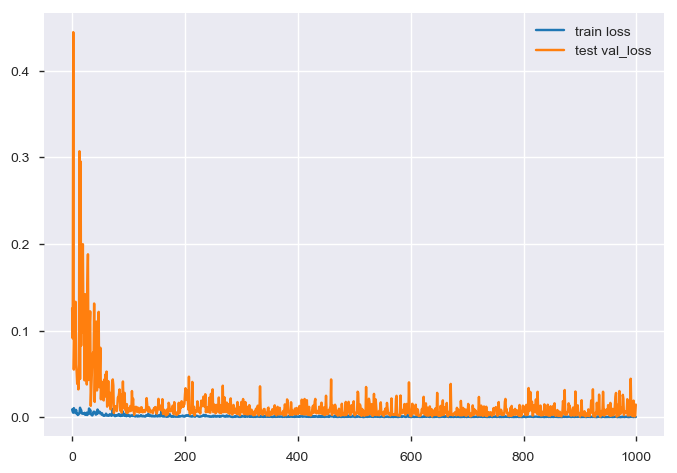

In [66]:
# plot history
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test val_loss')
plt.legend()
plt.show()

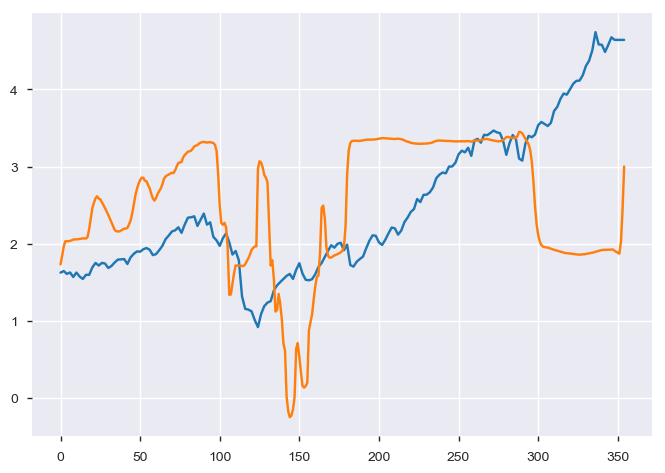

In [67]:
y_pred_lstm_imputed = model.predict(X_test)
plt.plot(Y_test.reshape(-1,1))
plt.plot(y_pred_lstm_imputed)

In [68]:
print(Y_test.shape,X_test.shape,y_pred_lstm_imputed.shape)

(355, 1) (355, 1, 34) (355, 1)


Check and updated shape of X_test. Scale X_train and x_test on correct shape of dataframe.

In [69]:
#Inverse transform the prediction and Y_test
X_test = X_test.reshape((X_test.shape[0],X_test.shape[2]))

# Concatenate with X_test to reshape before inverse transform
y_pred_lstm_imputed = concatenate((y_pred_lstm_imputed,X_test),axis=1)
print(X_test.shape,y_pred_lstm_imputed.shape,Y_test.shape)

#Invert scaling for forecast
y_pred_lstm_imputed = scaler_df_imputed.inverse_transform(y_pred_lstm_imputed)
print(X_test.shape,y_pred_lstm_imputed.shape,Y_test.shape)

#slice reverse transformed y_pred values to compare with Y_test actual values
y_pred_lstm_imputed = y_pred_lstm_imputed[:,0:1]


(355, 34) (355, 35) (355, 1)
(355, 34) (355, 35) (355, 1)


In [70]:
#Reconsturct Y_test with X_test and inverse transform it.
Y_test = concatenate((Y_test,X_test),axis=1)
Y_test = scaler_df_imputed.inverse_transform(Y_test)
#slice reverse transformed y_pred values to compare with Y_test actual values
Y_test = Y_test[:,0:1]

In [71]:
print(X_test.shape,y_pred_lstm_imputed.shape,Y_test.shape)

(355, 34) (355, 1) (355, 1)


In [72]:
plt.plot(Y_test)
plt.plot(y_pred_lstm_imputed)

# Evaluate Model LSTM model

In [73]:
#Calculate MSE between actual values Y_test and inverse transformed y_pred
mse = mean_squared_error(Y_test,y_pred_lstm_imputed)
print('Means Square Error between Y_test adn prediction values is :', mse)

Means Square Error between Y_test adn prediction values is : 392777.57411049335


In [75]:
print('predicted- {} ; Actual - {}'.format(y_pred_lstm_imputed[-1], Y_test[-1]))

predicted- [1863.96031366] ; Actual - [2736.61]


In [76]:
r2score = r2_score(Y_test,y_pred_lstm_imputed)
print('R2 score between Y_test adn prediction value is :', r2score)

R2 score between Y_test adn prediction value is : -0.5220053904367652


In [77]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 512)               1120256   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 1,120,769
Trainable params: 1,120,769
Non-trainable params: 0
_________________________________________________________________


# Apply Linear Regression model

In [78]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
#Convert Date index to column
#df_imputed.reset_index(inplace=True)

Best observed high variance features Vs target label 'Value_SP500_REAL_PRICE_MONTH' to understand linear corelation.

    This is to find colinearity between features and the prediction line for selected set of features. Predicted line would try to fit with linear regression model through the feature data points.
    
    The dataset here is very imbalanced and non linear which makes it different to predict a linear line with optimum coefficients and intercept.

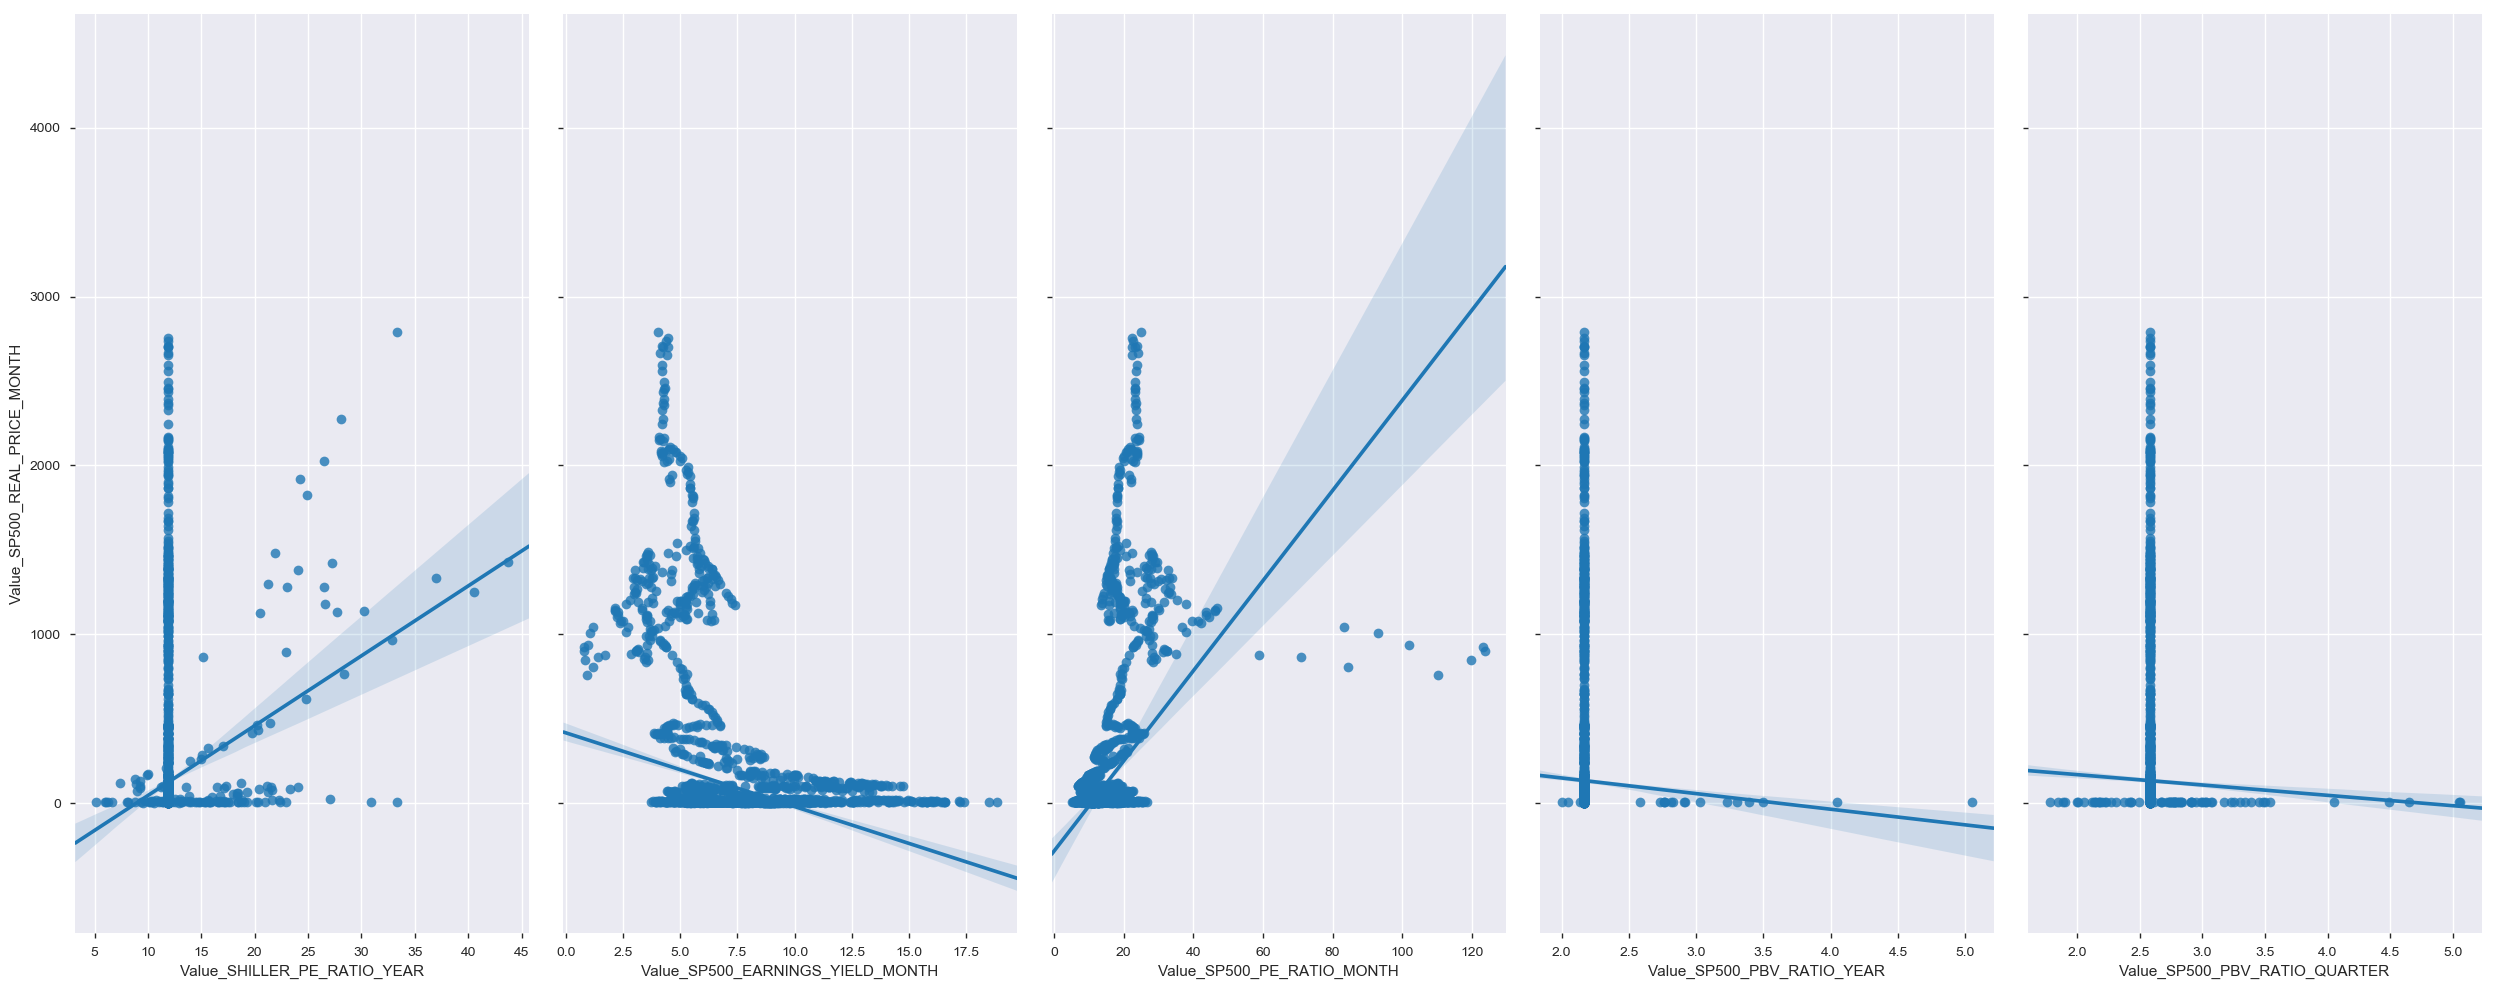

In [80]:
 #5 features with highest variance.
max_var_cols1 = Print_PCAfeatures_graph(df_imputed,a,-5)

# visualize relationship between the features and the target price using scatterplots
sns.pairplot(df_imputed, x_vars=max_var_cols1,y_vars=['Value_SP500_REAL_PRICE_MONTH'], height=10, aspect=0.5,kind='reg')

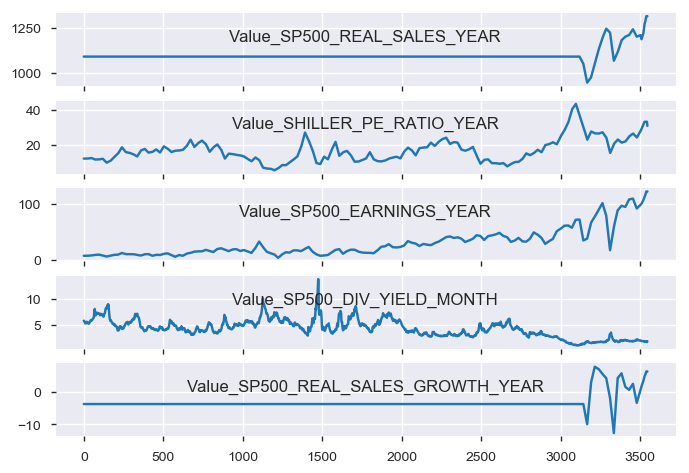

['Value_SP500_REAL_SALES_YEAR', 'Value_SHILLER_PE_RATIO_YEAR', 'Value_SP500_EARNINGS_YEAR', 'Value_SP500_DIV_YIELD_MONTH', 'Value_SP500_REAL_SALES_GROWTH_YEAR']


In [81]:
 #5 feature with highest PCA variance.
max_var_cols2 = Print_PCAfeatures_graph(df_interpolate,b,-5)
print(max_var_cols2)

# visualize relationship between the features and the target price using seaborn scatterplot. 
#High variance features Vs target label
sns.pairplot(df_interpolate, x_vars=max_var_cols2,y_vars=['Value_SP500_REAL_PRICE_MONTH'], height=10, aspect=0.5,kind='reg')

# Split into training and test dataset for Linear Regression

In [82]:
#Split data into train and test
#X_train, Y_train, X_test, Y_test = Create_Training_Test_Dataset(df_imputed,0.8,Linear_regr='True')

In [83]:
scaler = StandardScaler()
scaled_interpolated = scaler.fit_transform(df_interpolate.values)
df_scaled_interpolated = pd.DataFrame(scaled_interpolated,index=df_interpolate.index,columns = df_interpolate.columns)

In [84]:
# Split the size into 80% and 20% row-wise
split_percent = 0.8
train_size = int(len(df_interpolate) * split_percent)
test_size = len(df_interpolate) - train_size
#print(train_size,test_size)
print('Training and Test dataset is of size {} & {}'.format(train_size,test_size))

#Slice the df into train and test df.
train = df_interpolate.iloc[0:train_size,:]
test = df_interpolate.iloc[train_size:len(df),:]
print(train.shape, test.shape)

Training and Test dataset is of size 2837 & 710
(2837, 35) (710, 35)


In [85]:
# #Slice the df into train and test df.
# train = df_scaled_interpolated.iloc[0:train_size,:]
# test = df_scaled_interpolated.iloc[train_size:len(df),:]
# print(train.shape, test.shape)

In [86]:
# Slice Train dataset.
temp_train = train.drop(['Value_SP500_REAL_PRICE_MONTH'],axis=1,inplace=False)
X_train = train.drop(['Value_SP500_REAL_PRICE_MONTH'],axis=1,inplace=False)
Y_train = train['Value_SP500_REAL_PRICE_MONTH']
print('Features size of X_train and training target Y_train shape is {} & {}'.format(X_train.shape,Y_train.shape))

#Test dataset
X_test = test.drop(['Value_SP500_REAL_PRICE_MONTH'],axis=1,inplace=False)
Y_test = test['Value_SP500_REAL_PRICE_MONTH']
print('Features size of X_test and Test target Y_test shape is {} & {}'.format(X_test.shape,Y_test.shape))

Features size of X_train and training target Y_train shape is (2837, 34) & (2837,)
Features size of X_test and Test target Y_test shape is (710, 34) & (710,)


In [87]:
#np.array(temp_train[:]).reshape(-1,1)
#print((np.array(temp_train[:]).reshape(-1,2)).shape)

# Instantiate linear regression model from scikit-learn

In [88]:
# Instantiate linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Interpreting model coefficients

In [89]:
# print the intercept and coefficients
print(regr.intercept_)
print(regr.coef_)

-52960282224.714714
[-3.52758191e+00  4.64792766e+00 -9.38199017e+00  1.47251567e+01
  9.14566905e-01  1.24731470e+06 -3.56615690e+00 -1.01565204e+00
 -2.36112437e+06 -2.72362952e+06  8.56802301e+05  3.82777103e+00
 -6.63193797e+00  6.07584845e+00 -2.63378013e+06 -2.78901601e+01
  0.00000000e+00 -7.85441274e-01 -9.72632038e+07  9.49835975e+04
 -9.72632038e+07  3.79934390e+05  9.49835975e+04  3.79934390e+05
  7.59868780e+05  9.72632038e+07  7.59868780e+05  0.00000000e+00
  9.72632038e+07 -2.09451776e+00 -2.43158010e+07  6.85010842e+00
  0.00000000e+00 -2.43158010e+07]


# Making Predictions

In [90]:
#Linear regression prediction on testing set
y_pred_inter_regr = regr.predict(X_test)

In [91]:
print(y_pred_inter_regr.shape,X_test.shape,Y_test.shape)

(710,) (710, 34) (710,)


# Model evaluation metrics for linear regression

In [92]:
feature_cols = X_train.columns
# pair the feature names with the coefficients
print('Coefficients of all feature variables in training dataset are: ')
list(zip(feature_cols, regr.coef_))

Coefficients of all feature variables in training dataset are: 


[('Value_SP500_DIV_YIELD_MONTH', -3.527581911306619),
 ('Value_SP500_PE_RATIO_MONTH', 4.647927656217292),
 ('Value_SHILLER_PE_RATIO_MONTH', -9.381990168318),
 ('Value_SP500_EARNINGS_YIELD_MONTH', 14.725156681280367),
 ('Value_SP500_INFLADJ_MONTH', 0.9145669048368185),
 ('Value_SP500_PSR_QUARTER', 1247314.6972317942),
 ('Value_SP500_DIV_MONTH', -3.566156901350797),
 ('Value_SP500_DIV_YEAR', -1.0156520411537235),
 ('Value_SP500_DIV_GROWTH_YEAR', -2361124.3738160995),
 ('Value_SP500_DIV_GROWTH_QUARTER', -2723629.5197557933),
 ('Value_SP500_PBV_RATIO_QUARTER', 856802.3013627026),
 ('Value_SHILLER_PE_RATIO_YEAR', 3.82777103471323),
 ('Value_SP500_PE_RATIO_YEAR', -6.631937974639459),
 ('Value_SP500_DIV_YIELD_YEAR', 6.075848450087306),
 ('Value_SP500_PSR_YEAR', -2633780.126380311),
 ('Value_SP500_EARNINGS_YIELD_YEAR', -27.89016007413957),
 ('Value_SP500_PBV_RATIO_YEAR', 0.0),
 ('Value_SP500_INFLADJ_YEAR', -0.7854412736011674),
 ('Value_SP500_SALES_YEAR', -97263203.83254679),
 ('Value_SP500_SA

In [93]:
# The coefficients
#print('Coefficients: \n', regr.coef_)

# The mean squared error:  is always non-negative, and values closer to zero are better.
print('Mean squared error: {}'.format(mean_squared_error(Y_test, y_pred_inter_regr)))

# The Root mean squared error: RMSE is popular than MSE, because RMSE is interpretable in the "y" units.
print('Root Mean squared error: {}'.format(np.sqrt(mean_squared_error(Y_test, y_pred_inter_regr))))

# Explained variance score: 1 is perfect prediction
print('Variance R2 score: {}'.format(r2_score(Y_test, y_pred_inter_regr)))
print('intercept: ',regr.intercept_)
print('Score : ',regr.score)

Mean squared error: 1.7019465923554627e+21
Root Mean squared error: 41254655402.21446
Variance R2 score: -4676481844443726.0
intercept:  -52960282224.714714
Score :  <bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)>


In [94]:
#Reshape prediction and test set to concatenate with X_test to get origninal form of test dataset.
y_pred_inter_regr = y_pred_inter_regr[:,np.newaxis]
Y_test = Y_test[:,np.newaxis]
print(X_train.shape,X_test.shape,y_pred_inter_regr.shape,Y_test.shape)
y_pred_inter_regr = concatenate((y_pred_inter_regr, X_test), axis=1)
print(X_test.shape,y_pred_inter_regr.shape,Y_test.shape)

(2837, 34) (710, 34) (710, 1) (710, 1)
(710, 34) (710, 35) (710, 1)


In [95]:
# # Plot outputs
# for col in feature_cols:
#     plt.scatter(X_test[col], Y_test)
#     #plt.plot(X_test[col], y_pred_imputed_regr)
#     #print(col)

# plt.xticks(())
# plt.yticks(())
# plt.show()

# Select features from PCA for linear regression

In [96]:
print(max_var_cols2)

['Value_SP500_REAL_SALES_YEAR', 'Value_SHILLER_PE_RATIO_YEAR', 'Value_SP500_EARNINGS_YEAR', 'Value_SP500_DIV_YIELD_MONTH', 'Value_SP500_REAL_SALES_GROWTH_YEAR']


In [97]:
# Slice Train dataset.

X_train = train.drop(['Value_SP500_REAL_PRICE_MONTH'],axis=1,inplace=False)
X_train = X_train[max_var_cols2]
Y_train = train['Value_SP500_REAL_PRICE_MONTH']
print('Features size of X_train and training target Y_train shape is {} & {}'.format(X_train.shape,Y_train.shape))

#Test dataset
X_test = test.drop(['Value_SP500_REAL_PRICE_MONTH'],axis=1,inplace=False)
X_test = X_test[max_var_cols2]
Y_test = test['Value_SP500_REAL_PRICE_MONTH']
print('Features size of X_test and Test target Y_test shape is {} & {}'.format(X_test.shape,Y_test.shape))

Features size of X_train and training target Y_train shape is (2837, 5) & (2837,)
Features size of X_test and Test target Y_test shape is (710, 5) & (710,)


In [98]:
regr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [99]:
#Linear regression prediction on testing set
y_pred_inter_regr2 = regr.predict(X_test)

In [100]:
y_pred_inter_regr2[-1:]

array([341.81031509])

# Evaluate

In [101]:
feature_cols = X_train.columns
# pair the feature names with the coefficients
print('Coefficients of all feature variables in training dataset are: ')
list(zip(feature_cols, regr.coef_))

Coefficients of all feature variables in training dataset are: 


[('Value_SP500_REAL_SALES_YEAR', -0.008193688256245835),
 ('Value_SHILLER_PE_RATIO_YEAR', -3.60548619213432),
 ('Value_SP500_EARNINGS_YEAR', 3.1893269746838144),
 ('Value_SP500_DIV_YIELD_MONTH', -13.40016055794263),
 ('Value_SP500_REAL_SALES_GROWTH_YEAR', -3.200659475106326e-05)]

In [102]:
# The coefficients
#print('Coefficients: \n', regr.coef_)

# The mean squared error:  is always non-negative, and values closer to zero are better.
print('Mean squared error: {}'.format(mean_squared_error(Y_test, y_pred_inter_regr2)))

# The Root mean squared error: RMSE is popular than MSE, because RMSE is interpretable in the "y" units.
print('Root Mean squared error: {}'.format(np.sqrt(mean_squared_error(Y_test, y_pred_inter_regr2))))

# Explained variance score: 1 is perfect prediction
print('Variance R2 score: {}'.format(r2_score(Y_test, y_pred_inter_regr2)))
print('intercept: ',regr.intercept_)
print('Score : ',regr.score)

Mean squared error: 1270774.1303519597
Root Mean squared error: 1127.2861794380165
Variance R2 score: -2.4917383281428633
intercept:  97.83020340491342
Score :  <bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)>


MSE, RMSE and R2 score are very bad with all features and PCA selected features.

# Prediction using fbProphet

https://research.fb.com/prophet-forecasting-at-scale/

https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [103]:
from fbprophet import Prophet
# plt.style.available
plt.style.use("seaborn-whitegrid")
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import statsmodels.api as sm
from scipy import stats

In [104]:
#Reset index of df to make it a column as prerequisite for fbProphet.
df_fb = df_imputed.reset_index()
df_interpolate_fb = df_interpolate.reset_index()
df_interpolate_fb.tail() #for further use.

#Change dtype of Date column to datetime64 for fbProphet
df_interpolate_fb.loc[:,'Date'] = pd.to_datetime(df_interpolate_fb.loc[:,'Date'],format = '%Y%m%d')

In [105]:
#Plotting of S&P interpolated price vs date 
# First Subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(df_interpolate_fb['Date'], df_interpolate_fb['Value_SP500_REAL_PRICE_MONTH'],color ='blue')
#ax1.plot(df_fb['Date'], df_fb['Value_SP500_REAL_PRICE_MONTH'],color='red')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("SP500_REAL_PRICE_MONTH")
ax1.set_title("S&P 500 Index price History")

# #Second Subplot- original plot
# ax1.plot(df_fb['Date'], df_fb['Value_SP500_REAL_PRICE_MONTH'],color='red')
# ax1.set_xlabel("Date", fontsize=12)
# ax1.set_ylabel("Original S&P 500 Real Index price")
# ax1.set_title("S&P 500 Index price History")


#Third subplot
ax2.plot(df_interpolate_fb['Date'], df_interpolate_fb['Value_SP500_REAL_SALES_GROWTH_YEAR'],color='orange')
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("SP500_REAL_SALES_GROWTH_YEAR")
ax2.set_title("SP500_REAL_SALES_GROWTH_YEAR")
plt.show()



# Instantiate fbProphet

In [106]:
#Data preparation for fbprophet model. model takes date/timeseries and target label as input for fit and predict
df_interpolate_fb = df_interpolate_fb[['Date','Value_SP500_REAL_PRICE_MONTH']]

#Rename column names to 'ds' and 'y' as required by fbprophet model.
df_interpolate_fb.rename(columns={'Date':'ds','Value_SP500_REAL_PRICE_MONTH' : 'y'},inplace=True)

print(df_interpolate_fb.info(),df_interpolate_fb.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 2 columns):
ds    3547 non-null datetime64[ns]
y     3547 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 55.5 KB
None (3547, 2)


In [107]:
fb = Prophet()

In [108]:
fb.fit(df_interpolate_fb)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Akshat\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [109]:
#Create future dates
future_dates = fb.make_future_dataframe(periods=30)

#Predict prices for future dates
future_price = fb.predict(future_dates)

In [110]:
future_price[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
3572 2018-12-26  2098.752860  1943.518847  2252.708571
3573 2018-12-27  2101.261510  1954.460781  2240.861312
3574 2018-12-28  2106.528830  1957.374731  2263.008037
3575 2018-12-29  2103.307697  1946.379862  2260.651219
3576 2018-12-30  2108.458533  1949.496399  2270.121854

In [111]:
import matplotlib.dates as mdates

C:\Users\Akshat\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



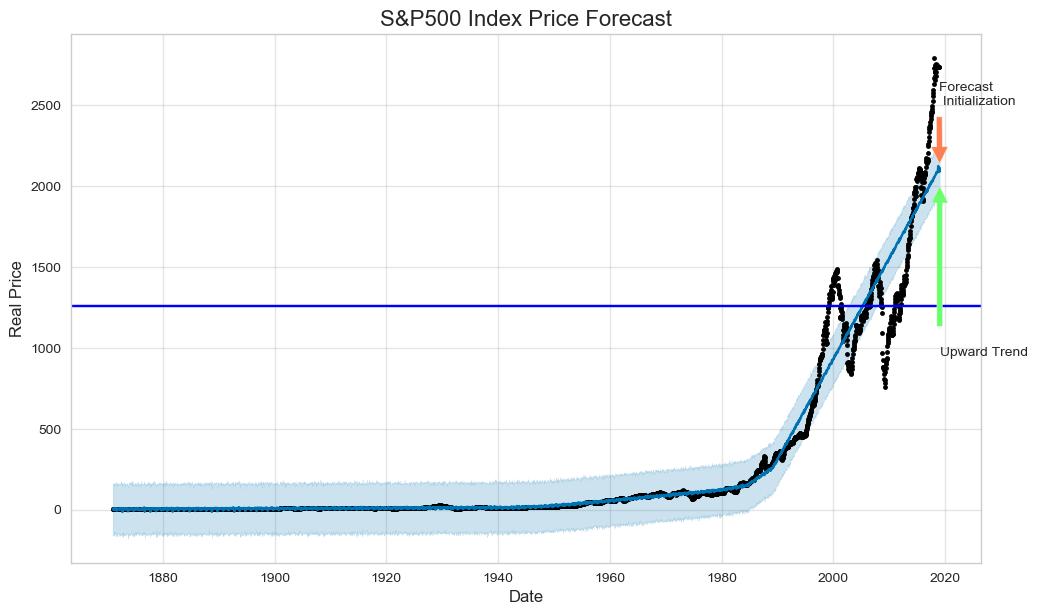

In [112]:
# Dates
starting_date = dt.datetime(2018, 11, 30)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2019, 1, 1)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2019, 1, 1)
pointing_arrow1 = mdates.date2num(pointing_arrow)

# Plot.
fig = fb.plot(future_price)
ax1 = fig.add_subplot(111)
ax1.set_title("S&P500 Index Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Real Price", fontsize=12)

# Forecast initialization arrow
ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 2100), xytext=(starting_date1,2500),
            arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
            )

# Trend emphasis arrow
ax1.annotate('Upward Trend', xy=(trend_date1, 2108), xytext=(trend_date1,950),
            arrowprops=dict(facecolor='#6cff6c', shrink=0.1),
            )

ax1.axhline(y=1260, color='b', linestyle='-')

plt.show()

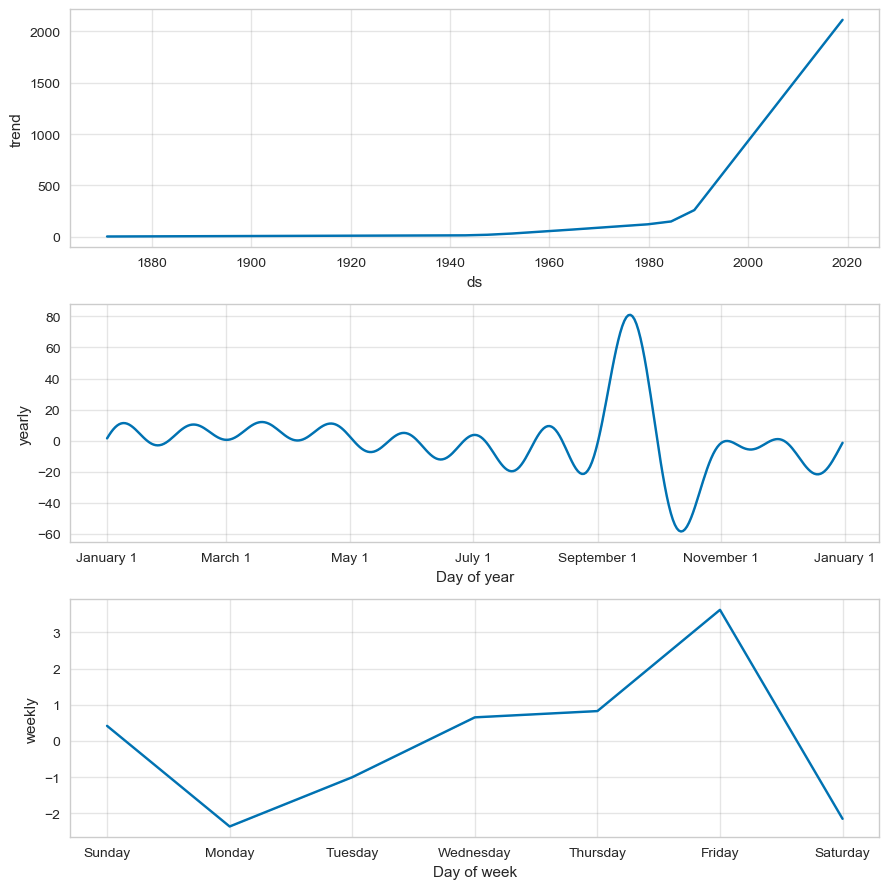

In [113]:
fig2 = fb.plot_components(future_price)
plt.show()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


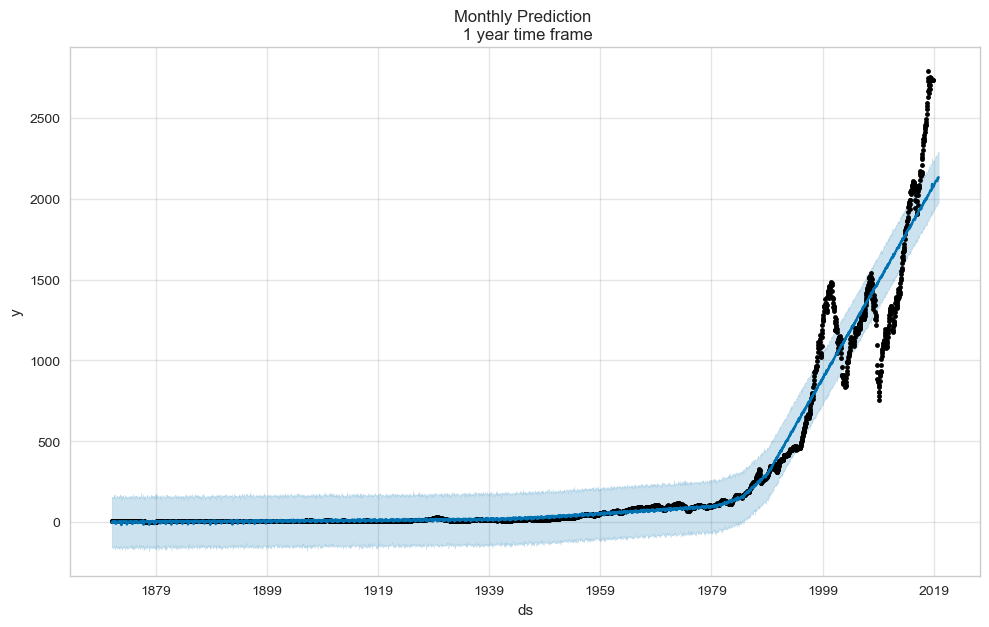

In [114]:
# Monthly Data Predictions
fbm = Prophet(changepoint_prior_scale=0.01).fit(df_interpolate_fb)
future = fbm.make_future_dataframe(periods=12, freq='M')
fcst = fbm.predict(future)
fig = fbm.plot(fcst)
plt.title("Monthly Prediction \n 1 year time frame")

plt.show()

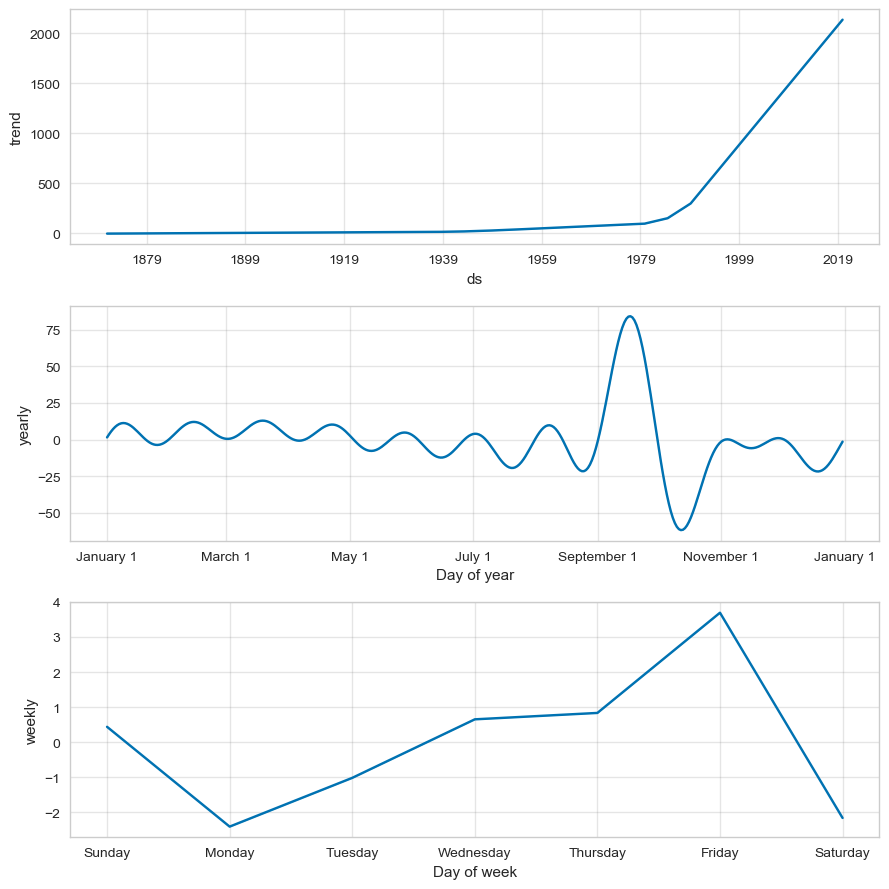

In [115]:
fig3 = fbm.plot_components(fcst)
plt.show()

In [116]:
# The mean squared error:  is always non-negative, and values closer to zero are better.
print('Mean squared error: {}'.format(mean_squared_error(Y_test, y_pred_inter_regr2)))

Mean squared error: 1270774.1303519597
